# Import library

In [3]:
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# for Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

# import several machine learning algorithms
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# display various ranges 
pd.options.display.float_format = '{:.4f}'.format

print("Setup complete...")

Setup complete...


# Import data

### Lending club

In [4]:
df1 = pd.read_csv('loan.csv')
org_df1 = df1.copy()
print(df1.shape)
df1.head()

(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,nan,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,0.0000,16901.0000,2.0000,2.0000,1.0000,2.0000,2.0000,12560.0000,69.0000,2.0000,7.0000,2137.0000,28.0000,42000.0000,1.0000,11.0000,2.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,nan,2.0000,nan,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,1208.0000,321915.0000,4.0000,4.0000,2.0000,3.0000,3.0000,87153.0000,88.0000,4.0000,5.0000,998.0000,57.0000,50800.0000,2.0000,15.0000,2.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,nan,4.0000,nan,0.0000,2.0000,4.0000,4.0000,9.0000,

### Titanic

In [5]:
df2 = pd.read_csv('Train_Titanic.csv')
org_df2 = df2.copy()
print(df2.shape)
df2.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


### House price

In [6]:
df3 = pd.read_csv('houseprice.csv')
org_df3 = df3.copy()
print(df3.shape)
df3.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Boston house

In [7]:
boston_dataset = load_boston()
df4 = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
org_df4 = df4
print(df4.shape)
df4.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [8]:
# print information for boston dataset
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

--------------------------------------------------------------------------

# 3. Missing data imputation

## 3.1. Introduction

## 3.2. Complete Case Analysis

Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in **discarding** observations where values in **any** of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables in the dataset. 

### Which variables can I impute with CCA?

CCA can be applied to both categorical and numerical variables.


### Assumptions

CCA works well when the data are missing completely at random (MCAR). In fact, we should use CCA if we have reasons to believe that data is missing at random, and not otherwise. When data is MCAR, excluding observations with missing information is in essence the same as randomly excluding some observations from the dataset. Therefore the dataset after CCA is a fair representation of the original dataset. 


### Advantages

- Easy to implement
- No data manipulation required
- Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantages

- It can exclude a large fraction of the original dataset (if missing data is abundant)
- Excluded observations could be informative for the analysis (if data is not missing at random)
- CCA will create a biased dataset if the complete cases differ from the original data (e.g., when missing information is in fact MAR or NMAR and not missing at random).
- When using our models in production, the model will not know how to handle missing data

### When to use CCA

- Data is missing completely at random
- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible. However, as general guidance, if the total amount of missing data is ~5% of the original dataset or less, CCA is a viable option.

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option.

### CCA and models in production

When using CCA, we remove all observations that contain missing information. However, the data that we want to score with our model, may indeed contain missing information. This will pose a problem when using our model in live systems, or as we call it, when putting or models into production: when an observation contains missing data, the model will not be able to handle it. 

In order to avoid this problem, when putting models into production we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values by another number. We can choose any from the imputation techniques that we will discuss in the following lectures to replace NA in the data to be scored.

In [9]:
df3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# find the variables with missing observations

vars_with_na = [var for var in df3.columns if df3[var].isnull().sum() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
# let's find out whether they are numerical or categorical
df3[vars_with_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

There are both numerical and categorical variables with missing observations. We can see from the variable types that some are float and some are object.

In [12]:
# let's have a look at the values of the variables with
# missing data

df3[vars_with_na].head(10)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0000,NaN,BrkFace,196.0000,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0000,RFn,TA,TA,NaN,NaN,NaN
1,80.0000,NaN,None,0.0000,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0000,RFn,TA,TA,NaN,NaN,NaN
2,68.0000,NaN,BrkFace,162.0000,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0000,RFn,TA,TA,NaN,NaN,NaN
3,60.0000,NaN,None,0.0000,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0000,Unf,TA,TA,NaN,NaN,NaN
4,84.0000,NaN,BrkFace,350.0000,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0000,RFn,TA,TA,NaN,NaN,NaN
5,85.0000,NaN,None,0.0000,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0000,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0000,NaN,Stone,186.0000,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0000,RFn,TA,TA,NaN,NaN,NaN
7,nan,NaN,Stone,240.0000,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0000,RFn,TA,TA,NaN,NaN,Shed
8,51.0000,NaN,None,0.0000,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0000,Unf,Fa,TA,NaN,NaN,NaN
9,50.0000,NaN,None,0.0000,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0000,RFn,Gd,TA,NaN,NaN,NaN


In [13]:
# let's find out the percentage of observations missing per variable

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
data_na = df3[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
data_na

,variable,na_percentage
16,PoolQC,0.9952
18,MiscFeature,0.9630
1,Alley,0.9377
17,Fence,0.8075
10,FireplaceQu,0.4726
0,LotFrontage,0.1774
11,GarageType,0.0555
12,GarageYrBlt,0.0555
13,GarageFinish,0.0555
14,GarageQual,0.0555


The first 6 variables contain a lot of missing information. So we can't use CCA if we consider those variables, as most of the observations in the dataset will be discarded. We could otherwise use CCA if we omit using those variables with a lot of NA.

For this demo, I will ignore the first 6 variables with a lot of missing data, and proceed with CCA in the remaining of the dataset.

In [14]:
# capture variables with no or less than 5% NA

vars_cca = [var for var in df3.columns if df3[var].isnull().mean() < 0.05]
vars_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [15]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables

# the method dropna(), discards the observations that contain
# na in any of the rows / columns

len(df3[vars_cca].dropna()) / len(df3)

0.9671232876712329

In [16]:
# create the complete case dataset
# in other words, remove observations with na in any variable

data_cca = df3[vars_cca].dropna()
df3.shape, data_cca.shape

((1460, 81), (1412, 70))

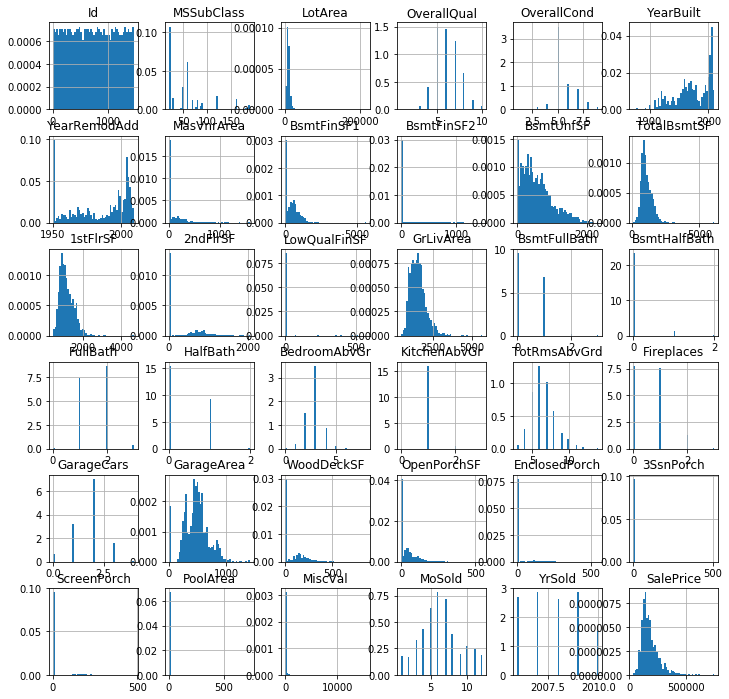

In [17]:
# plot the histograms for all numerival variables in the complete
# case dataset (as we did in section 3)

data_cca.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

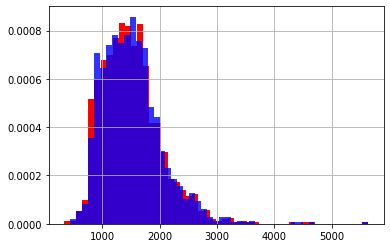

In [18]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df3['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

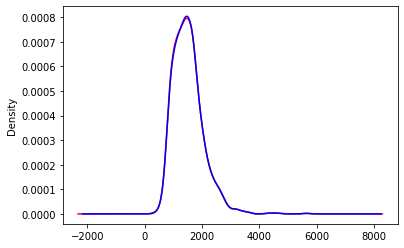

In [19]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df3['GrLivArea'].plot.density(color='red')

# data after cca
data_cca['GrLivArea'].plot.density(color='blue')

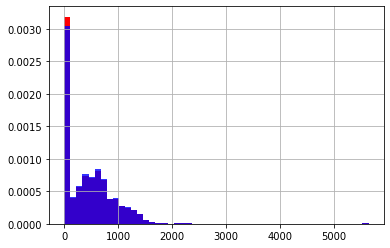

In [20]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df3['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

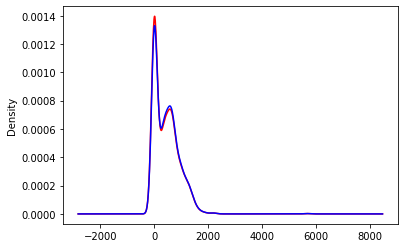

In [21]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df3['BsmtFinSF1'].plot.density(color='red')

# data after cca
data_cca['BsmtFinSF1'].plot.density(color='blue')

As we can see from the above plots, the distribution of the selected numerical variables in the original and complete case dataset is very similar, which is what we expect from CCA if data is missing at random and only for a small proportion of the observations.

In the next cells I will explore the distribution of categorical variables. To do so, I will evaluate the percentage of observations that show each of the unique categories, as we did in sections 2 and 3 of the course.

In [22]:
# the following function captures the percentage of observations
# for each category in the original and complete case dataset
# and puts them together in a new dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [23]:
# run the function in a categorical variable
categorical_distribution(df3, data_cca, 'BsmtQual')

,original,cca
TA,0.4445,0.4589
Gd,0.4233,0.4313
Ex,0.0829,0.0850
Fa,0.0240,0.0248


In [24]:
categorical_distribution(df3, data_cca, 'MasVnrType')

,original,cca
None,0.5918,0.5885
BrkFace,0.3048,0.3102
Stone,0.0877,0.0907
BrkCmn,0.0103,0.0106


In [25]:
categorical_distribution(df3, data_cca, 'SaleCondition')

,original,cca
Normal,0.8205,0.8208
Partial,0.0856,0.0864
Abnorml,0.0692,0.0708
Family,0.0137,0.0142
Alloca,0.0082,0.0057
AdjLand,0.0027,0.0021


As we can see from the output of the cells above, the distribution of houses in each of the categories, is very similar in the original and complete case dataset, which again, is what is expected if the data is missing completely at random, and the percentage of missing data is small.

## 3.3. Mean or Median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

**Note the following**:

- If a variable is normally distributed, the mean, median and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for  numerical variables.
- If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
- For discrete variables casted as 'int' (to save memory), the mean may not be an integer, therefore the whole variable will be re-casted as 'float'. In order to avoid this behaviour, we can replace NA with the median instead. The median will inevitably be an integer / discrete value as well.


### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.


### Assumptions

- Data is missing completely at random (MCAR)
- The missing observations, most likely look like the majority of the observations in the variable (aka, the mean / median)

If data is missing completely at random, then it is fair to assume that the missing values, are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent / average observation.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)

### Limitations

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.

Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.


### When to use mean / median imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data

Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even in those cases when data is not MCAR and there are a lot of missing values. The reason behind this, is the simplicity of the technique.


### Final note

Replacement of NA with mean / median is widely used in the data science community and in various data science competitions. See for example the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean / median imputation is done together with adding a binary "missing indicator" variable to capture those observations where the data was missing (see lecture "Missing Indicator"), thus covering 2 angles: if the data was missing completely at random, this would be captured by the mean /median imputation, and if it wasn't this would be captured by the additional "missing indicator" variable. Both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.

### Titanic dataset

In [37]:
# let's look at the percentage of NA
df2 = org_df2.copy()
df2.isnull().mean()

NameError: name 'org_df2' is not defined

The only variable with missing data is Age, with ~20% of missing observations.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [27]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    df2[['Age', 'Fare']],  # predictors
    df2['Survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [28]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

Age    0.1942
Fare   0.0000
dtype: float64

In [29]:
# let's make a function to fill missing values with the mean or median:
# the variable takes the dataframe, the variable, and the value of the
# mean or median
# and returns the variable with the filled na


def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [30]:
# calculate the median Age

median = X_train.Age.median()
median

29.0

In [31]:
# calculate the mean Age

mean = X_train.Age.mean()
mean

29.915338645418327

In [32]:
# create a new variable with the missing values replaced
# using the function we created above

# first replace with the median
X_train['Age_median'] = impute_na(X_train, 'Age', median)

# now replace with the mean
X_train['Age_mean'] = impute_na(X_train, 'Age', mean)

# the mean contains many decimals, so I round to 1
# using the round function from numpy
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)

X_train.head(15)

,Age,Fare,Age_median,Age_mean
857,51.0000,26.5500,51.0000,51.0000
52,49.0000,76.7292,49.0000,49.0000
386,1.0000,46.9000,1.0000,1.0000
124,54.0000,77.2875,54.0000,54.0000
578,nan,14.4583,29.0000,29.9000
549,8.0000,36.7500,8.0000,8.0000
118,24.0000,247.5208,24.0000,24.0000
12,20.0000,8.0500,20.0000,20.0000
157,30.0000,8.0500,30.0000,30.0000
127,24.0000,7.1417,24.0000,24.0000


Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 28 (median) or 30 (mean).

In [33]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in Age, ~20%

print('Original variable variance: ', X_train['Age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  210.45286924636747
Variance after median imputation:  169.64401397346137
Variance after mean imputation:  169.51269265508222


As expected, the variance is underestimated, because now many values are the same ==> either the mean or the median value.

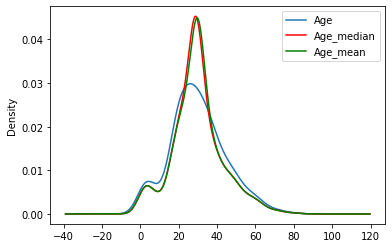

In [34]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Mean / median imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

In [35]:
# we also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['Fare', 'Age', 'Age_median', 'Age_mean']].cov()

,Fare,Age,Age_median,Age_mean
Fare,2328.8016,78.4689,64.6845,63.2239
Age,78.4689,210.4529,210.4529,210.4528
Age_median,64.6845,210.4529,169.6440,169.5149
Age_mean,63.2239,210.4528,169.5149,169.5127


We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

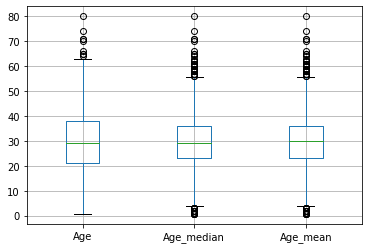

In [36]:
# Finally, I mentioned that mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers

# Let's find out using a boxplot
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

From the boxplot above, we can see that after the imputation not only we have more outliers on the higher Age values, but we have now outliers as well for the lower values of Age.

**Is this important?**

If we are after true outliers, we need to keep this behaviour in mind, to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that is happening.

### House Prices Dataset

Let's repeat the exercise in the House Prices dataset from. In this dataset, there are variables with a lot or with few missing data. Therefore we can compare the effect of mean / median imputation in both scenarios.

In [38]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [39]:
# print the variables that contain missing data

# in the next list comprehension, I loop over all the columns
# of the dataset and select those that contain missing data

[var for var in cols_to_use if df3[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [40]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

df3[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage   0.1774
MasVnrArea    0.0055
GarageYrBlt   0.0555
dtype: float64

**Remember that the mean and the median that we will use to replace the NA needs to be calculated in the train set and propagated to the test set.**

In [41]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(df3[cols_to_use],
                                                    df3['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

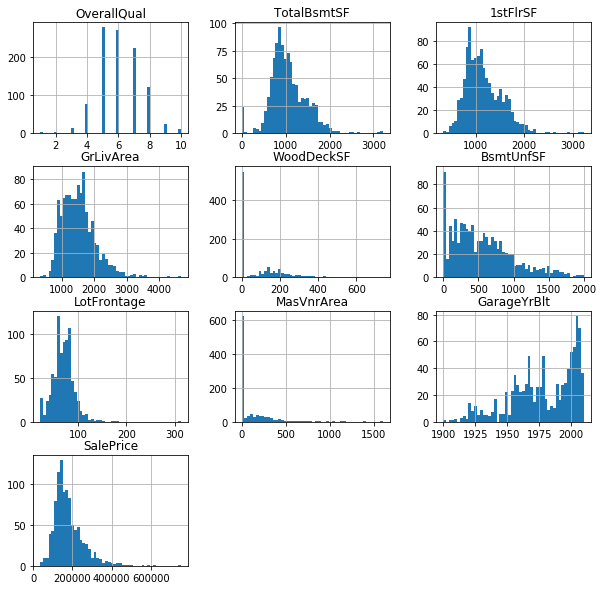

In [42]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [43]:
# create a new variable with the missing values replaced
# by the median using the function we created above

# I repeat the following lines for each of the variables with NA
# over the next cells

median = X_train['LotFrontage'].median()

X_train.loc[:,'LotFrontage_median'] = impute_na(X_train, 'LotFrontage', median)
X_test.loc[:,'LotFrontage_median'] = impute_na(X_test, 'LotFrontage', median)

In [44]:
median = X_train['MasVnrArea'].median()

X_train.loc[:,'MasVnrArea_median'] = impute_na(X_train, 'MasVnrArea', median)
X_test.loc[:,'MasVnrArea_median'] = impute_na(X_test, 'MasVnrArea', median)

In [45]:
median = X_train['GarageYrBlt'].median()

X_train.loc[:, 'GarageYrBlt_median'] = impute_na(X_train, 'GarageYrBlt', median)
X_test.loc[:,'GarageYrBlt_median'] = impute_na(X_test, 'GarageYrBlt', median)

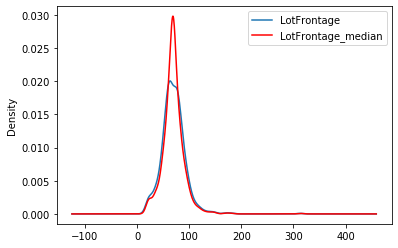

In [46]:
# let's evaluate the effect of median imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

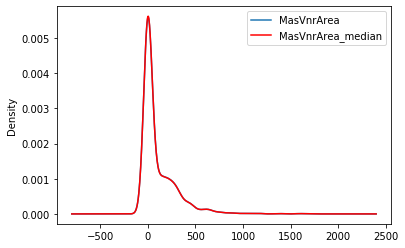

In [47]:
# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# original distribution of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

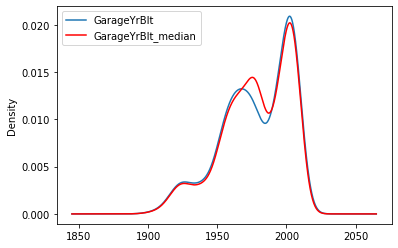

In [48]:
# similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a massive change in the
# original distribution of the variable, however we see more values
# at around the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['GarageYrBlt_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [49]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885676
Variance after median imputation:  434.06604265416564


In [50]:
# this is not the case for MasnVnrArea, because the % of missing data was small
print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.538710039466
Variance after median imputation:  32874.27007404175


In [51]:
# for GarageBlt, the % of missing data was small so the effect
# on the variance will also be small

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074134
Variance after median imputation:  591.3356883144767


In [52]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.
# see how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables

X_train.cov()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
OverallQual,1.8439,288.6241,224.2973,409.1242,31.6856,174.6147,6.5871,101.4970,17.9028,83201.3178,5.3848,100.5330,16.8754
TotalBsmtSF,288.6241,168293.1033,121207.9016,86151.9183,12279.6571,75133.0732,2908.8555,24788.7654,3173.0424,20039280.1632,2370.9292,24654.3600,2989.4734
1stFlrSF,224.2973,121207.9016,139865.6289,104440.1295,11094.0559,49874.4915,3379.7935,20865.9521,2009.1956,17836312.6083,2750.7471,20801.3568,1890.2716
GrLivArea,409.1242,86151.9183,104440.1295,268127.6607,15583.9548,52033.9208,3919.9518,35207.8514,2738.9830,29344773.5178,3189.6858,34967.1434,2576.3456
WoodDeckSF,31.6856,12279.6571,11094.0559,15583.9548,16485.8205,-1833.2010,134.7414,3208.9243,665.8911,3029981.3071,106.0091,3212.1010,627.6246
BsmtUnfSF,174.6147,75133.0732,49874.4915,52033.9208,-1833.2010,187524.0822,949.6573,7540.7881,1823.0652,6833028.2584,788.0954,7472.1101,1724.1415
LotFrontage,6.5871,2908.8555,3379.7935,3919.9518,134.7414,949.6573,532.5872,680.5603,30.6117,668964.4542,532.5872,674.4233,28.0953
MasVnrArea,101.4970,24788.7654,20865.9521,35207.8514,3208.9243,7540.7881,680.5603,32983.5387,1203.5838,6836438.7199,553.9213,32983.5387,1134.3809
GarageYrBlt,17.9028,3173.0424,2009.1956,2738.9830,665.8911,1823.0652,30.6117,1203.5838,624.3059,930935.4893,24.7552,1182.6733,624.3059
SalePrice,83201.3178,20039280.1632,17836312.6083,29344773.5178,3029981.3071,6833028.2584,668964.4542,6836438.7199,930935.4893,6105730505.1757,544838.8369,6790441.9922,877485.4181


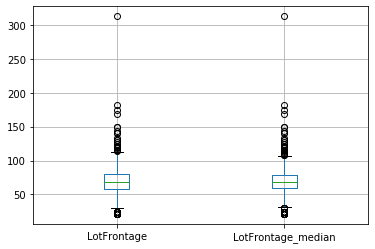

In [53]:
# Finally, let's explore the knock-on effect on outliers

# there is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whisker)
# but not a visible effect for the other 2 variables

X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

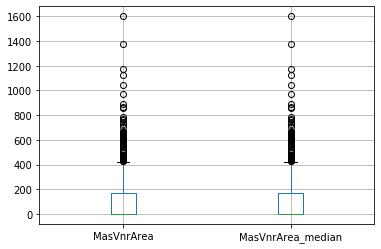

In [54]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

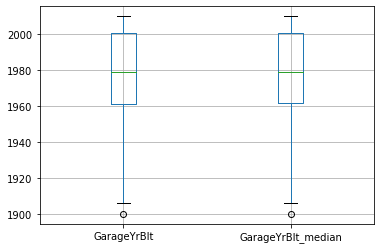

In [55]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()

**That is all for this demonstration**.

Towards the end of this section, I will show you how to do mean / median imputation with open source Python packages, as part of a machine learning model pipeline.

## 3.4. Arbitrary value imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value. Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).


### Which variables can I impute with an arbitrary value?

Both categorical and numerical variables can be imputed by arbitrary values. 

For categorical variables, this is the equivalent of replacing all instances of NA by an additional label, which is very common practice, so I will treat it separately in a future notebook.

### Assumptions

- Data is not missing at random.

If this is the case, we want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median, which represent the most common value.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)
- Captures the importance of "missingness" if there is one


### Limitations

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- If the arbitrary value is at the end of the distribution it may mask or create outliers
- Need to be careful not to chose an arbitrary value too similar to the mean or median (or any other common value of the variable distribution)


### When to use arbitrary value imputation

Replacing the NA by arbitrary values should be used when there are reasons to believe that the NA are not missing at random. In situations like this, we would not like to replace with the median or the mean, and therefore make the NA look like the majority of our observations. Instead, we want to flag the fact that the observation is missing.

This approach is used widely both in organisations and in Kaggle competitions. It consists of replacing the NA by an arbitrary value. Any of your creation, but ideally different from the median/mean/mode, and not within the normal values of the variable.

The problem consists in deciding which arbitrary value to choose.

### Final note

When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal the fact that the value for that observation is missing. So arbitrary value imputation is also common practice in real life data collections.

In [64]:
df2 = org_df2.copy()

In [66]:
usecols = ['Age', 'Fare', 'Survived']
df2 = df2[usecols]
df2.isnull().mean()

Age        0.1987
Fare       0.0000
Survived   0.0000
dtype: float64

The only variable with missing data is Age, with ~20% of missing observations.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. For arbitrary value imputation this is not so important, because we chose the value arbitrarily, however it is good to adhere to this practice and select the arbitrary value by looking only at the distribution of the variables in the train set.

In [70]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    df2[['Age', 'Fare']],  # predictors
    df2['Survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [71]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()    

Age    0.1942
Fare   0.0000
dtype: float64

In [72]:
# let's make a function to fill missing values with an arbitrary value:
# the variable takes the dataframe, the variable, and the value to replace na

# and returns the variable with the filled na


def impute_na(df, variable, value):

    return df[variable].fillna(value)

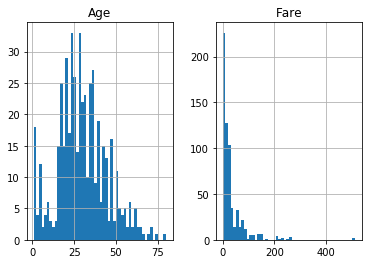

In [73]:
# let's explore the distribution of the variables
# to decide which arbitrary value to use

X_train.hist(bins=50)
plt.show()

In [75]:
# For this demo I will replace NA by 2 different arbitrary values
# one at the far right end of the distribution ==> 99
# and alternatively by -1, taking advantage that Age takes only positive values

# first replace with 99
X_train['Age_99'] = impute_na(X_train, 'Age', 99)

# now replace with -1
X_train['Age_minus1'] = impute_na(X_train, 'Age', -1)

X_train.head(15)

,Age,Fare,Age_99,Age_minus1
857,51.0000,26.5500,51.0000,51.0000
52,49.0000,76.7292,49.0000,49.0000
386,1.0000,46.9000,1.0000,1.0000
124,54.0000,77.2875,54.0000,54.0000
578,nan,14.4583,99.0000,-1.0000
549,8.0000,36.7500,8.0000,8.0000
118,24.0000,247.5208,24.0000,24.0000
12,20.0000,8.0500,20.0000,20.0000
157,30.0000,8.0500,30.0000,30.0000
127,24.0000,7.1417,24.0000,24.0000


Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 99 or -1.

In fact, the effect on the variance will also be driven by the magnitude of the arbitrary value selected for the imputation, compare 99 with -1.

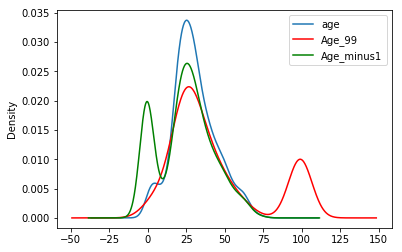

In [10]:
# we can see that the distribution has changed 
# with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, arbitrary value imputation distorts the original distribution of the variable Age. The transformed variable shows more values around arbitrary values.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Arbitrary value imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree based algorithms.

In [11]:
# we also said that arbitrary value imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'Age_99', 'Age_minus1']].cov()

,fare,age,Age_99,Age_minus1
fare,2248.326729,136.176223,-38.722001,177.733891
age,136.176223,194.163047,194.163047,194.163047
Age_99,-38.722001,194.163047,888.705199,-175.265319
Age_minus1,177.733891,194.163047,-175.265319,307.940053


We see indeed that the covariance between Age and Fare is changed after the arbitrary value imputation.

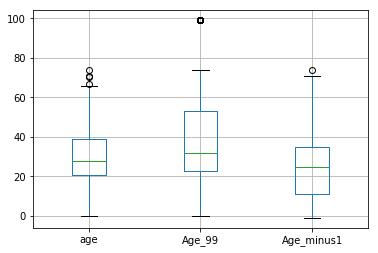

In [12]:
# Finally, I mentioned that arbitrary value imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['age', 'Age_99', 'Age_minus1']].boxplot()

We can see that adding values at the end of the distribution mask entirely values that were outliers in the original distribution.

## House Prices Dataset

Let's repeat the exercise in the House Prices dataset. In this dataset, there are variables with a lot or few missing data. Therefore we can compare the effect of arbitrary value imputation in both scenarios.

In [13]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [78]:
# let's load the House Prices dataset

df3 = org_df3[cols_to_use].copy()
print(df3.shape)
df3.head()

(1460, 10)


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0000,196.0000,2003.0000,208500
1,6,1262,1262,1262,298,284,80.0000,0.0000,1976.0000,181500
2,7,920,920,1786,0,434,68.0000,162.0000,2001.0000,223500
3,7,756,961,1717,0,540,60.0000,0.0000,1998.0000,140000
4,8,1145,1145,2198,192,490,84.0000,350.0000,2000.0000,250000


In [15]:
# print the variables that contain missing data

# in the next list comprehension, I loop over all the columns 
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

First, I separate into train and test.

In [17]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

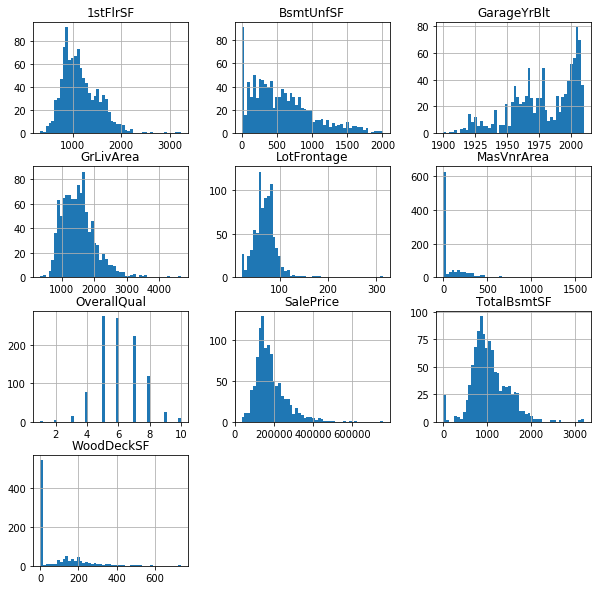

In [18]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [19]:
# Let's work with the variable LotFrontage first

# I create a new variable with the missing values replaced
# by 999 using the function we created above

# in this case I chose 999 to place the value at the far right end of the
# distribution. As we can see from the hist above, LotFrontAge takes values
# up to 300

X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', 999)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', 999)

C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
# MasVnrArea takes values up to 1500, therefore, 999 will not
# work for this variable, as it is a normal value, I need to chose
# a bigger value: 2999

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', 2999)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', 2999)

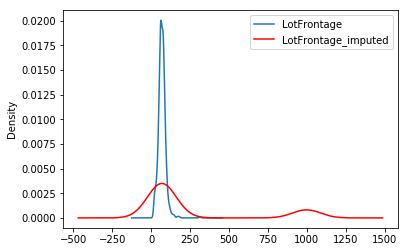

In [21]:
# let's evaluate the effect of arbitrary imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards 999

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the 999
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

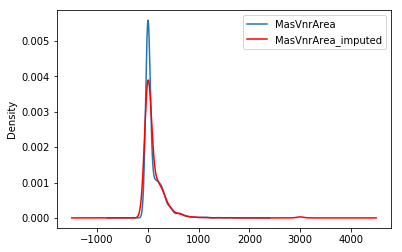

In [22]:
# For MasVnrArea, because the percentage of missing data
# was low, the change in the distribution is smaller

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with 2999
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From the above plots we can see that the distribution of LotFrontAge is changed quite dramatically, but not so much the distribution of MasVnrArea. This is because the % of missing values in the second variable is quite small. However, depending on the arbitrary value you choose to replace the NA, the distribution will be more or less affected.

Why don't you go ahead and try different numbers and compare the distributions?

Finally, you can see from the demo, that the process of selecting the arbitrary value is quite manual. We need to go variable per variable, observe the distribution and min / max values, to then select the arbitrary value. It works well for a few variables, but if our datasets contain hundreds or thousands, it becomes a bit inconvenient. An alternative for automation, is to place the values at the end of the distribution, as we will see in the next notebook.

In [23]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

# in fact the effect is quite dramatic

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885676
Variance after imputation:  130742.07296576179


In [24]:
# the same for MasnVnrArea, even though the % of NA is small, the
# arbitrary value is much bigger, which in turn affects the variance
# quite a bit

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.538710039466
Variance after imputation:  73677.02879932376


In [25]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,7.585010e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,-18.279174,1.140556e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,1582.711167,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-19005.620715,8.391605e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,1620.452017,2.503117e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,7485.021442,1.971276e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,9634.034363,3.694487e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,45.643154,1.588757e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,5377.154974,2.664993e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,950743.964420,7.152962e+06


**That is all for this demonstration. In later sections I will show you how to do arbitrary value imputation with scikit-learn and feature engine.**

### 3.5. End of distribution imputation

In the previous notebook we replaced missing data by an arbitrary value. However, determining the value of the arbitrary value can be laborious and it is usually a manual job. We can automate this process by automatically selecting arbitrary values at the end of the variable distributions.

#### How do we select the value at the end?

- If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation
- If the variable is skewed, we can use the IQR proximity rule

We learnt these techniques in section 3, in  the lecture on "Outliers".

- We can also select the min / max value and multiply it by a certain amount of times, like 2 or 3.


### Which variables can I impute with an arbitrary value?

This method is suitable for numerical variables.

### Assumptions

- MNAR - values are not missing at random

If the value is not missing at random, we don't want to replace it for the mean / median and therefore make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)
- Captures the importance of "missingess" if there is one

### Disadvantages

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- This technique may mask true outliers in the distribution


### Final note

I haven't seen this method used in data competitions, however, this method is used in finance companies. When capturing the financial history of customers, in order not to assume that missing is at random, the missing data are replaced by a value at the end of the distribution.

See my [talk at PyData London in 2017](https://www.youtube.com/watch?v=KHGGlozsRtA) for an example of feature engineering in Finance.


### Titanic

In [80]:
usecols=['Age', 'Fare', 'Survived']
df2 = org_df2[usecols]

In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Imputation important

Imputation has to be done over the training set, and then propagated to the test set. For this imputation technique, this means that when selecting the value with which we will replace the NA, we need to do so only by looking at the distribution of the variables in the training set. Then we use the selected value to replace NA both in the train and test set.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

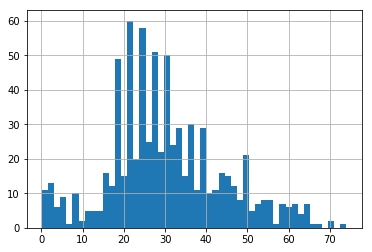

In [5]:
# let's have a look at the distribution of Ages
X_train.age.hist(bins=50)

In [6]:
# let's make a function to fill missing values with an extreme value:
# the variable takes the dataframe, the variable, and the value to replace na

# and returns the variable with the filled na

def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [7]:
# far end of the distribution:

# Because Age looks approximately Gaussian, I use the
# mean and std to calculate the replacement value

X_train.age.mean() + 3 * X_train.age.std()

72.03416424092518

In [8]:
# replace NA with the value calculated above

X_train['Age_imputed'] = impute_na(X_train, 'age',
                                   X_train.age.mean() + 3 * X_train.age.std())

X_train.head(15)

,age,fare,Age_imputed
501,13.0,19.5000,13.000000
588,4.0,23.0000,4.000000
402,30.0,13.8583,30.000000
1193,NaN,7.7250,72.034164
686,22.0,7.7250,22.000000
971,NaN,7.8792,72.034164
117,30.0,56.9292,30.000000
540,2.0,26.0000,2.000000
294,49.0,110.8833,49.000000
261,35.0,26.2875,35.000000


Look at the rows with missing data (NaN) in Age, and see how in the new variable they were replaced by 73.436.

In [9]:
# we can see a change in the variance after end of tail imputation
# this is expected, because the percentage of missing data is quite
# high in Age ~20%

print('Original variable variance: ', X_train['age'].var())
print('Variance after 99 imputation: ', X_train['Age_imputed'].var())

Original variable variance:  194.16304666581854
Variance after 99 imputation:  427.39198372523583


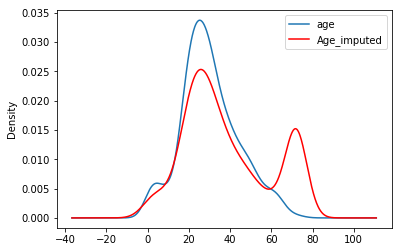

In [10]:
# we can see that the distribution has changed 
# with now more values accumulating towards the tail

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# imputed variable
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, similarly to arbitrary value imputation, end of tail imputation distorts the original distribution of the variable Age. The transformed variable shows more values around selected tail value.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. End of tail imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

On the other hand, this technique works quite well with tree based algorithms.

In [11]:
# we also said end of tail imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'Age_imputed']].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,19.647139
age,136.176223,194.163047,194.163047
Age_imputed,19.647139,194.163047,427.391984


We see indeed that the covariance between Age and Fare is changed after the arbitrary value imputation.

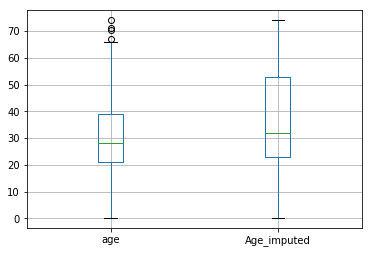

In [12]:
# Finally, I mentioned that end tail imputation may
# affect the perception of outliers

# Let's find out using a boxplot
X_train[['age', 'Age_imputed']].boxplot()

Masks the outliers!!

### House price

In [ ]:
df 3 = 

In [13]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [14]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [15]:
# in the next list comprehension, I loop over all the columns 
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [17]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

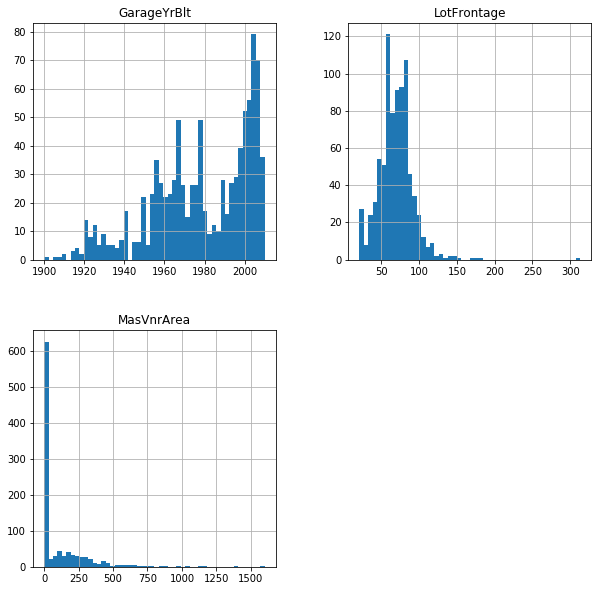

In [18]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist(bins=50, figsize=(10,10))
plt.show()

In [19]:
# the variables are not normally distributed

# let's impute the NA using the IQR proximity rule, which we learnt
# in the lecture on outliers in section 3

# calulate the IQR
IQR = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(
    0.25)

# calculate the upper boundary
extreme_value = X_train['LotFrontage'].quantile(0.75) + 3 * IQR

extreme_value

146.0

In [20]:
# let's impute the NA with the extreme value

X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', extreme_value)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', extreme_value)

C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
# let's do the same for MasVnrArea

# calculate the IQR
IQR = X_train['MasVnrArea'].quantile(0.75) - X_train['MasVnrArea'].quantile(
    0.25)

# calculate the upper boundary
extreme_value = X_train['MasVnrArea'].quantile(0.75) + 3 * IQR

extreme_value

680.0

In [22]:
# let's impute the NA with the extreme value

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', extreme_value)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', extreme_value)

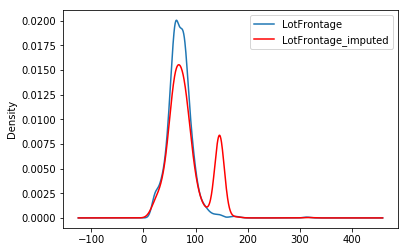

In [23]:
# let's evaluate the effect of end tail imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the extreme value

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# imputed variable
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

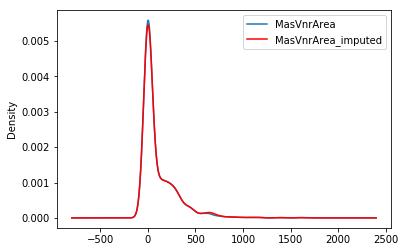

In [24]:
# let's evaluate the effect of arbitrary imputation on the distribution

# MasVnrArea had only few outliers, so the change in the distribution is
# not so dramatic. Less than when using an arbitrary value of 2999 as
# we did in the previous notebook

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# imputed variable
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

From the above plots we can see that the distribution of LotFrontAge is changed quite dramatically, but not so much the distribution of MasVnrArea. This is because the % of missing values in the second variable is quite small.

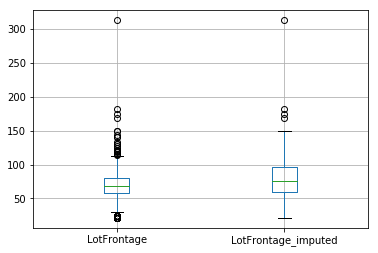

In [25]:
# we see that there are a fewer outliers as well after the imputation

X_train[['LotFrontage', 'LotFrontage_imputed']].boxplot()

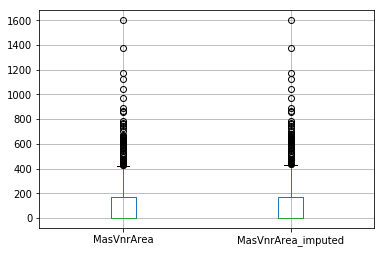

In [26]:
# however, the outliers are not so affected for MasVnrArea

X_train[['MasVnrArea', 'MasVnrArea_imputed']].boxplot()

In [27]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885676
Variance after imputation:  1313.0936747097685


In [28]:
# the same for MasnVnrArea is not so big
# Note particularly, that this effect is smaller than the one we observed
# when imputing by 2999 in the previous notebook!!!

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.538710039466
Variance after imputation:  34441.33126074531


In [29]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.934872e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,3.425501,1.035991e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,639.100679,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-850.739199,7.680598e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2308.792907,2.473980e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,3142.724647,2.055453e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3723.250100,3.541558e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,26.484608,1.274750e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,542.437312,3.088048e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,578446.035624,6.872641e+06


### 3.6. Frequent category imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mode imputation consists of replacing all occurrences of missing values (NA) within a variable by the mode, which in other words refers to the **most frequent value** or **most frequent category**.


### Which variables can I impute with most frequent / mode Imputation?

Although the mode, or most frequent value can be calculated for both numerical and categorical variables, in practice, we only use this technique on categorical variables. The reason is that for numerical variables, the mean or the median tend to better represent the average value of the population.


### Assumptions

- Data is missing completely at random (MCAR)
- The missing observations, most likely look like the majority of the observations in the variable (aka, the mode)

The rationale is that the value that should have been seen for the missing observation is most likely the most frequent value or category of the variable.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)


### Limitations

- Distortion the relation of the most frequent label with other variables within the dataset
- May lead to an over-representation of the most frequent label if there is a big number of NA


### When to use mode / most frequent category imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data

### House Price dataset

In [2]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

The variable BsmtQual contains only a few observations with NA (2.5), therefore, replacing those observations with the value of the most frequent category is a good approach.

On the other hand, the variable FireplaceQu, contains missing data in almost half of the observations. Therefore, replacing those with the most frequent category is most likely going to distort the relationship of the most frequent category with the sale price. 

In addition, if so many observations in FireplaceQu are missing, it could be for a reason and not just at random, so we could be better off capturing that somehow with a different imputation technique. We will see how in the next notebook. For now, let's explore the effect of replacing NA by the most frequent categories when missing data is few or a lot.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the most frequent category has to be selected from the training set, and used to replace NA both in train and test sets.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [5]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

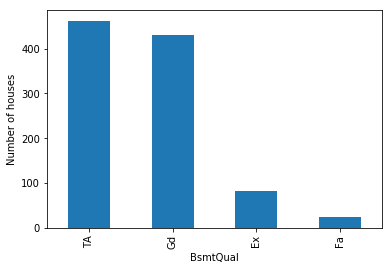

In [6]:
# let's inspect the number of observations per category in BsmtQual

# we used this line of code in section 3 on variable characteristics

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [7]:
# Let's find the most frequent category for BsmtQual

X_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

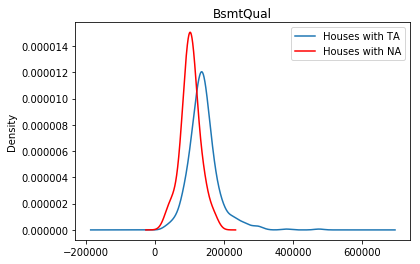

In [8]:
# let's plot the distribution of the target for the houses that:

# * show the most frequent category or
# * those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot houses with the most frequent label
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# select and plot houses with missing data in the variable
X_train[X_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('BsmtQual')

The plot above indicates that the houses with missing data cost overall less than those with the label TA. Therefore, replacing missing values by TA, could affect the overall distribution, if there were a lot of NA.

In [9]:
# I keep the original distribution of SalePrice for the most
# frequent category for later

# the use of tmp is common to name temporal variables

tmp = X_train[X_train['BsmtQual']=='TA']['SalePrice']

In [10]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('TA', inplace=True)
X_test['BsmtQual'].fillna('TA', inplace=True)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
# check that NA have been filled

X_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

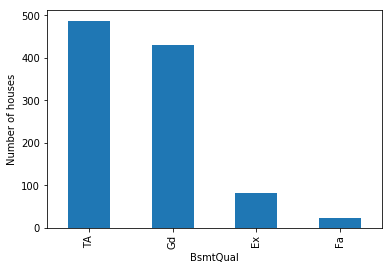

In [12]:
# evaluate effect on distribution of categories

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

From the above plot, we see that now there are a few more houses with the label TA, which are those that before contained NA, but the overall effect on the distribution is not dramatic. The plot looks almost identical to that one before the imputation.

Text(0.5, 1.0, 'BsmtQual')

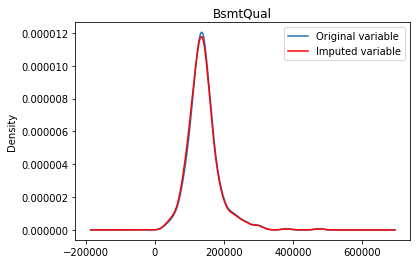

In [13]:
# did the distribution of SalePrice for the most frequent category change?
# let's have a look

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of salePrice for houses with most frequent label
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('BsmtQual')

The distribution of house prices between the original and imputed variable is quite similar, because the number of missing data was small. We expected this behaviour.

Let's explore the effect of mode imputation when the percentage of missing data is high.

#### FirePlaceQu

In [14]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

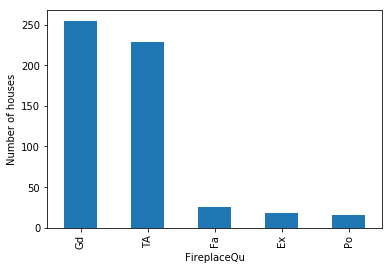

In [15]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [16]:
# Let's find the most frequent category for FirePlaceQu

X_train['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FirePlaceQu')

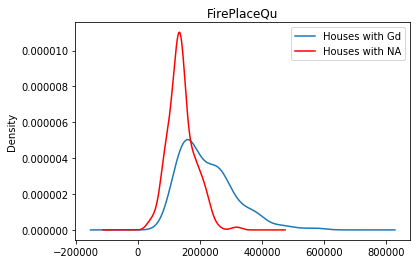

In [17]:
# let's plot the distribution of the target for the houses that
# show the most frequent category and those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# houses with the most frequent label for FirePlaceQu
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# houses with missing data in FirePlaceQu
X_train[X_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

The distributions are quite different, houses with missing data cost overall less than those with the label Gd.

In [18]:
# I keep the original distribution of SalePrice for houses
# that show Gd in FirePlaceQu, for later.

tmp = X_train[X_train['FireplaceQu']=='Gd']['SalePrice']

In [19]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Gd', inplace=True)
X_test['FireplaceQu'].fillna('Gd', inplace=True)

Text(0, 0.5, 'Number of houses')

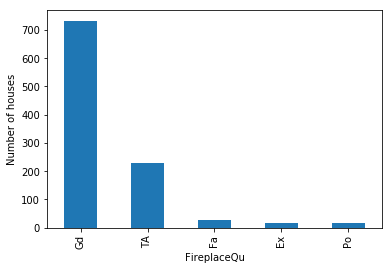

In [20]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In this case, we see a big distortion in the original distribution of the variable. Now we have a lot more houses that contain the variable Gd, respect to the houses that show the other variables. Originally, half of the observartions in FirePlaceQu were missing. Now, all of those values contain Gd. That is why, we observe a big increase in Gd in the bar plot. 

Text(0.5, 1.0, 'FirePlaceQu')

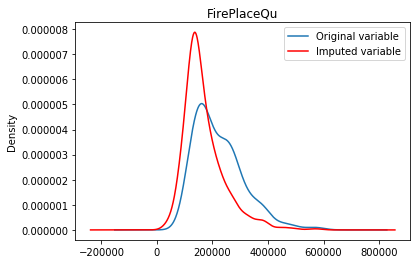

In [21]:
# let's plot the distribution of the target for the original variable
# fand the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of the variable
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

The average House value for the most frequent category has decreased quite dramatically after adding the house values of the NA, following re-categorisation of NA as the most frequent label.

Thus, the importance of this particular label for prediction of house price, is masked or changed by the addition of missing values. 

In cases like this, when the percentage of missing values is so high (~50%) we are better off creating a new category to enclose the observations with NA. I will show this in the next lecture.

## 3.7. Missing category imputation

## Arbitrary value imputation for categorical variables

This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.

The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)
- Captures the importance of "missingness" if there is one
- No assumption made on the data


### Limitations

- If the number of NA is small, creating an additional category may cause trees to over-fit

For categorical variables this is the method of choice, as it treats missing values as a separate category, without making any assumption on the variable or the reasons why data could be missing. It is used widely in data science competitions and organisations. See for example the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

### House Prices dataset

In [2]:
# let's load the dataset with a few columns for the demonstration

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the training set, so in principle we could do this in the original dataset and then separate into train and test. However, I do not recommend this practice. You will see in later notebooks that splitting into train and test right at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [5]:
# let's remind ourselves of the % of missing values
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

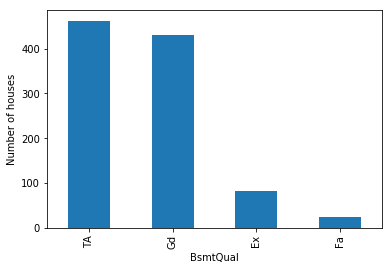

In [6]:
# let's inspect the number of observations per category in BsmtQual

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [7]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Text(0, 0.5, 'Number of houses')

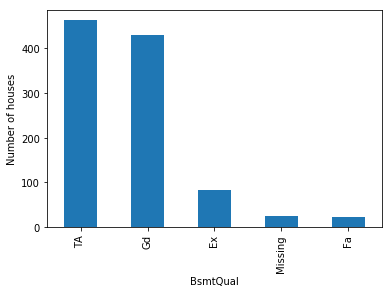

In [8]:
# let's plot the number of houses per category in the imputed variable

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

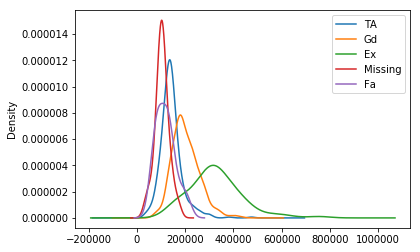

In [9]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

You can see that the houses with different labels show different distributions of Prices. For example the houses with the label Ex tend to be the most expensive, whereas the houses that show Missing or Fa are the cheapest.

#### FirePlaceQu

In [10]:
# let's remind ourselves of the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

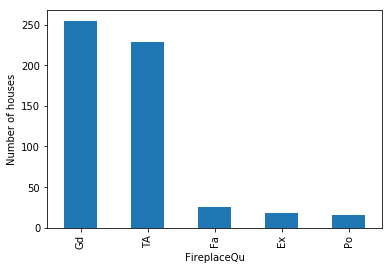

In [11]:
# let's inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [12]:
# Let's fill na in both train and test

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

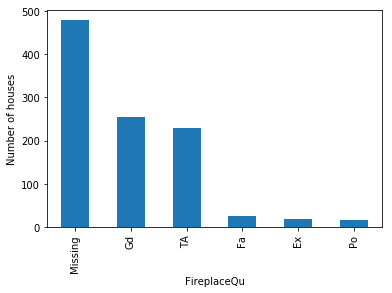

In [13]:
# let's inspect the number of observations per category
# in the imputed variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

We see now the additional category with the missing data: Missing

This label contains most of the houses, as most showed missing data originally.

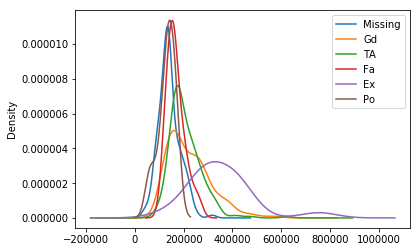

In [14]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# a plot per category
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)


# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

We observe again that the houses with different labels for FirePlaceQu also show different distributions of SalePrice, with those showing Ex being the most expensive ones and those showing Missing, or Fa being the cheapest ones.

**That is all for this demonstration. In later notebooks I will show you how to automate this with scikit=learn and feature engine**

In [15]:
# BONUS: in case you need the plot for your analysis:
# here is a way of making it more general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

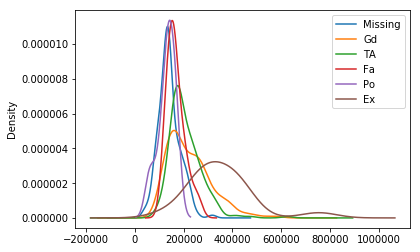

In [16]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

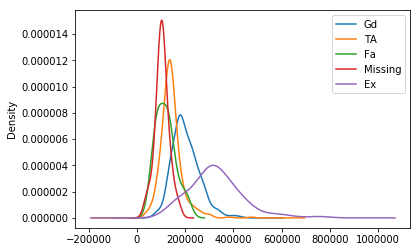

In [17]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

## 3.8. Random sample imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can then be then used for machine learning.

Random sampling imputation is in principle similar to mean / median / mode imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.

Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA. In random sample imputation one takes as many random observations as missing values are present in the variable.

By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.

By random sampling observations of the present categories, for categorical variables, we guarantee that the frequency of the different categories / labels within the variable is preserved.


### Which variables can I impute by Random Sample Imputation?

Random Sample Imputation can be applied to both numerical and categorical variables.


### Assumptions

Random sample imputation assumes that the data are missing completely at random (MCAR). If this is the case, it makes sense to substitute the missing values by values extracted from the original variable distribution. 

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, for categorical variables, will be selected more often -because there are more of them to select from-, but other less frequent values will be selected as well. Thus, the variance and distribution of the variable are preserved. 

The idea is to replace the population of missing values with a population of values with the same distribution of the original variable.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Preserves the variance of the variable

### Limitations

- Randomness
- The relationship of imputed variables with other variables may be affected if there are a lot of NA
- Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations.


### When to use Random Sample Imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data
- Well suited for linear models as it does not distort the distribution, regardless of the % of NA

If used in combination with a Missing Indicator, as we will see in the next lecture, then this method can be used when data is not missing at random as well, or when there are many missing observations.


#### Randomness

Randomness may not seem much of a concern when replacing missing values for data competitions, where the whole batch of missing values is replaced once and then the dataset is scored and that is the end of the problem. However, in business scenarios the situation is very different. 

Imagine for example a car manufacturer is trying to predict how long a certain car will be in the garage before it passes all the security tests. Today, they receive a car with missing data in some of the variables, they run the machine learning model to predict how long this car will stay in the garage, the model replaces missing values by a random sample of the variable and then produces an estimate of time. Tomorrow, when they run the same model on the same car, the model will randomly assign values to the missing data, that may or may not be the same as the ones it selected today, therefore, the final estimation of time in the garage, may or may not be the same as the one obtained the day before.

In addition, imagine the car manufacturer evaluates 2 different cars that have exactly the same values for all of the variables, and missing values in exactly the same subset of variables. They run the machine learning model for each car, and because the missing data is randomly filled with values, the 2 cars, that are exactly the same, may end up with different estimates of time in the garage.

This may sound completely trivial and unimportant, however, businesses must follow a variety of regulations, and some of them require the same treatment to be provided to the same situation. So if instead of cars, these were people applying for a loan, or people seeking for disease treatment, the machine learning model would end up providing different solutions to candidates that are otherwise in the same conditions. And this is not fair or acceptable. This behaviour needs to be avoided.

#### So, should we randomly replace NA or not?

It is still possible to replace missing data by random sample, but these randomness needs to be controlled, so that individuals in the same situation end up with the same scores and therefore with the same solutions offered. How can we ensure this? by appropriately setting seeds during the random extraction of values.

Finally, another potential limitation of random sampling, similarly to replacing with the mean and median, is that estimates of covariance and correlations with other variables in the dataset may also be washed off by the randomness, particularly if there are a lot of missing observations.


### Final note

Replacement of missing values by random sample, although similar in concept to replacement by the median or mean, is not as widely used in the data science community as the mean / median imputation, presumably because of the element of randomness, or because the code implementation is not so straightforward.

However, it is a valid approach, with clear advantages over mean / median imputation as it preserves the distribution of the variable. And if you are mindful of the element of randomness and account for it somehow, this may as well be your method of choice, particularly for linear models.

## Random Sampling for Numerical Variables

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('../titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Imputation important

Imputation should done over the training set, and then propagated to the test set. This means that the random sample to be used to fill missing values both in train and test set, should be extracted from the train set.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((916, 3), (393, 3))

In [5]:
# let's impute Age by random sampling both in
# train and test sets

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train['Age_imputed'] = X_train['age'].copy()
X_test['Age_imputed'] = X_test['age'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['age'].dropna().sample(
    X_train['age'].isnull().sum(), random_state=0)

random_sample_test = X_train['age'].dropna().sample(
    X_test['age'].isnull().sum(), random_state=0)

# what is all of the above code doing?

# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['Age'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['age'].isnull()].index
random_sample_test.index = X_test[X_test['age'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['age'].isnull(), 'Age_imputed'] = random_sample_train
X_test.loc[X_test['age'].isnull(), 'Age_imputed'] = random_sample_test

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [6]:
# check that NA were imputed
X_train['Age_imputed'].isnull().sum()

0

In [7]:
# check that NA were imputed
X_test['Age_imputed'].isnull().sum()

0

In [8]:
X_train.head(15)

,survived,age,fare,Age_imputed
501,1,13.0,19.5000,13.0
588,1,4.0,23.0000,4.0
402,1,30.0,13.8583,30.0
1193,0,NaN,7.7250,40.5
686,1,22.0,7.7250,22.0
971,0,NaN,7.8792,39.0
117,1,30.0,56.9292,30.0
540,1,2.0,26.0000,2.0
294,0,49.0,110.8833,49.0
261,1,35.0,26.2875,35.0


We can see how NAs are replaced by different values in the different rows! This is what we wanted.

#### Random sampling preserves the original distribution of the variable

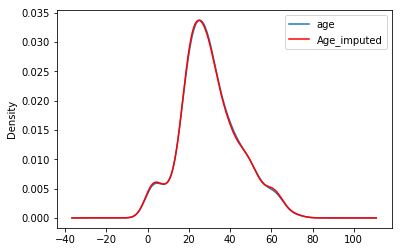

In [9]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

We can see that replacing missing values with a random sample from the training set preserves the original distribution of the variable. If you remember from previous notebooks, every other imputation technique altered the distribution of Age, because the percentage of NA in Age is high, ~20%. However, random sample imputation preserves the distribution, even in those cases. So this imputation technique is quite handy, if we are building linear models and we don't want to distort normal distributions.

In [10]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean / median
# imputation (check the previous notebook for comparison)

print('Original variable variance: ', X_train['age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  194.16304666581854
Variance after random imputation:  198.53703762759602


In [11]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean / median imputation

X_train[['fare', 'age', 'Age_imputed']].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
Age_imputed,100.938070,194.163047,198.537038


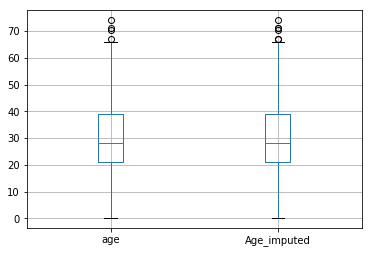

In [12]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
X_train[['age', 'Age_imputed']].boxplot()

So random sample imputation offers all the advantages provided by the preservation of the original distribution. And that is a big plus, particularly, if we care about distribution and outliers for our machine learning models. This is particularly relevant for linear models. But not so important for tree based algorithms.

## Randomness can lead to different scores being assigned to the same observation

Let's examine the effect of randomness on multiple scoring, and how we can mitigate this behaviour, as this is very important when putting our models in production / integrating our models with live systems.

In [13]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 5

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [14]:
# and now let's fill that NA with a random value
# extracted from the same variable where observations are available

# extract a random value, just 1
sampled_value = X_train['age'].dropna().sample(1)

# re index to 5
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,3.0


In [15]:
# let's repeat the exercise again: 
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train['age'].dropna().sample(1)

# re index to 5
sampled_value.index = [15]  #pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,22.0


In [16]:
# and again
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train['age'].dropna().sample(1)

# re index to 5
sampled_value.index = [15]  #pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,36.0


We can see that every time we repeat the operation, we get a different value replacement for exactly the same observation. In fact, if we repeat the process 1000 times:

Text(0, 0.5, 'Number of times')

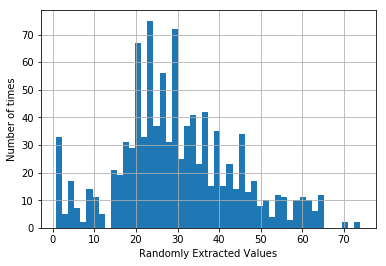

In [17]:
# if we repeat the process 1000 times:

values_ls = []

# capture the non-Na values to speed
# the computation
tmp = X_train.age.dropna()

for i in range(1000):
    
    # extract a random value, just 1
    sampled_value = tmp.sample(1).values
    
    # add the extracted value to the list
    values_ls.append(float(sampled_value))
    
pd.Series(values_ls).hist(bins=50)
plt.xlabel('Randomly Extracted Values')
plt.ylabel('Number of times')

We obtain very different values for the same observation. Note how the distribution of extracted values is similar to the distribution of Age.

If this were patients looking for treatment, every time we run a predictive model, which would operate on the differently randomly extracted values, we would assign patients with the same characteristics to different treatments, and this is not OK.

### How can we fix this behaviour?

We can fix this randomness by assigning a seed:

In [18]:
values_ls = []

for i in range(100):

    # extract a random value, just 1, now with seed
    sampled_value = X_train.age.dropna().sample(1, random_state=10)

    # add random value to the list
    values_ls.append(float(sampled_value))

# print the values
pd.Series(values_ls).unique()

array([23.5])

In [19]:
values_ls

[23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5]

Now that we set the seed, every randomly extracted value for that observation is the same.

However, if we set the same seed for every single observation, what would happen is that for every different observation, we would be filling the NA with exactly the same value (same seed == same random value extracted). This would be the equivalent to arbitrary value imputation!!!

We don't want that behaviour either.

Therefore, we want our seed to change observation per observation, but in a controlled manner, so that 2 observations that are exactly the same, receive the same imputed random values. But 2 observations that are different, receive different imputed random values.

### Controlling the element of randomness by varying the seed

We can attribute a different seed to each observation, and in fact, we can make this seed depend on an alternative variable of the same observation, thus, thinking in the Titanic dataset, if 2 passengers paid exactly the same Fare, they would get exactly the same probability of survival (when Age is missing).

In [20]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 5

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [21]:
# the seed is now the Fare

int(observation.fare)

25

In [22]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(1,
                                            random_state=int(observation.fare))
sampled_value.index = [15]

observation['Age_random'] = sampled_value
observation

,survived,age,fare,Age_random
15,0,NaN,25.925,44.0


In [23]:
# for a different observation with a different Fare,
# we would get a different randomly extracted value

observation = data[data.age.isnull()].tail(1)
observation

,survived,age,fare
1305,0,NaN,14.4542


In [24]:
# new seed
int(observation.fare)

14

In [25]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(1,
                                            random_state=int(observation.fare))
sampled_value.index = [1305]

observation['Age_random'] = sampled_value
observation

,survived,age,fare,Age_random
1305,0,NaN,14.4542,40.0


This is a way of controlling the randomness. Using the Fare to set the random state, you guarantee that for 2 passengers with equal Fare, the Age will be replaced with the same number, and therefore the 2 passengers will get the same probability of survival.

### Note!!

In real life, you will build models that use tens of variables or more. So in cases like those, you can think of picking the 3-5 more important variables, those that have the strongest impact on the output of the machine learning model, and combine them to create the random state. Therefore, customers that share the 3-5 main variable values, will get the same scores.

## Random Sampling for Categorical Variables

In [26]:
# let's load the dataset with a few columns for the demonstration
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [27]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [28]:
# let's impute BsmtQual by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['BsmtQual_imputed'] = X_train['BsmtQual'].copy()
X_test['BsmtQual_imputed'] = X_test['BsmtQual'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['BsmtQual'].dropna().sample(
    X_train['BsmtQual'].isnull().sum(), random_state=0)

random_sample_test = X_train['BsmtQual'].dropna().sample(
    X_test['BsmtQual'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['BsmtQual'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['BsmtQual'].isnull()].index
random_sample_test.index = X_test[X_test['BsmtQual'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_train
X_test.loc[X_test['BsmtQual'].isnull(), 'BsmtQual_imputed'] = random_sample_test

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [29]:
# let's impute FireplaceQu by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu'].copy()
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu'].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = X_train['FireplaceQu'].dropna().sample(
    X_train['FireplaceQu'].isnull().sum(), random_state=0)

random_sample_test = X_train['FireplaceQu'].dropna().sample(
    X_test['FireplaceQu'].isnull().sum(), random_state=0)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['FireplaceQu'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract 
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train['FireplaceQu'].isnull()].index
random_sample_test.index = X_test[X_test['FireplaceQu'].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_train
X_test.loc[X_test['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = random_sample_test

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [30]:
# check that nulls were removed
X_train['FireplaceQu_imputed'].isnull().sum()

0

In [31]:
# and now let's evaluate the effect of the imputation on the distribution
# of the categories and the target within those categories

# we used a similar function in the notebook of arbitrary value imputation
# for categorical variables

def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # percentage of observations per category, original variable
            df[variable_original].value_counts() / len(df[variable_original].dropna()),

            # percentage of observations per category, imputed variable
            df[variable_imputed].value_counts() / len(df)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'imputed']

    return tmp

In [32]:
# run the function in a categorical variable
categorical_distribution(X_train, 'BsmtQual', 'BsmtQual_imputed')

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [33]:
# run the function in a categorical variable
categorical_distribution(X_train, 'FireplaceQu', 'FireplaceQu_imputed')

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


As expected, the percentage of observations within each category is very similar in the original and imputed variables, for both BsmtQual where NA are low and FireplaceQu were NA are high.

In [34]:
# now let's look at the distribution of the target within each
# variable category

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].dropna().unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

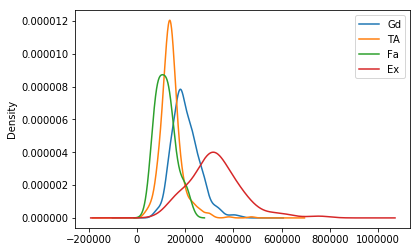

In [35]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

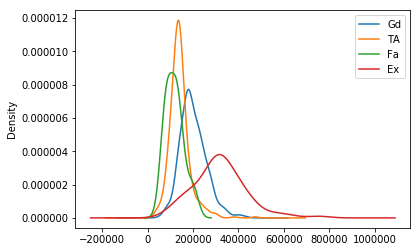

In [36]:
automate_plot(X_train, 'BsmtQual_imputed', 'SalePrice')

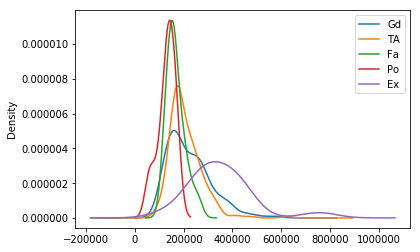

In [37]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

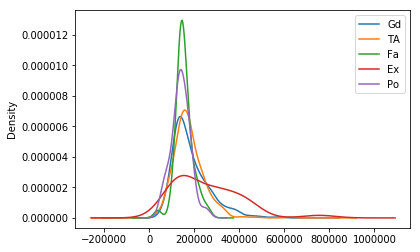

In [38]:
automate_plot(X_train, 'FireplaceQu_imputed', 'SalePrice')

For BsmtQual, where the NA are low, the distribution of the target is preserved for the categories in the original and imputed variable. However, for FireplaceQu, which contains more NAs, the distribution of the target per category is affected slightly.

## Note on Random Sample Imputation code

The code provided in this notebook for random sampling, is a bit complex. Don't worry! You can do random sample imputation using the package feature engine in just a couple of lines. I will show you how in a coming notebok


## 3.9. Adding a missing indicator

In previous notebooks we learnt how to replace missing values by the mean, median or by extracting a random value. In other words we learnt about mean / median and random sample imputation. These methods assume that the data are missing completely at random (MCAR).

There are other methods that can be used when values are not missing at random, for example arbitrary value imputation or end of distribution imputation. However, these imputation techniques will affect the variable distribution dramatically, and are therefore not suitable for linear models.

**So what can we do if data are not MCAR and we want to use linear models?**

If data are not missing at random, it is a good idea to replace missing observations by the mean / median / mode AND  **flag** those missing observations as well with a **Missing Indicator**. A Missing Indicator is an additional binary variable, which indicates whether the data was missing for an observation (1) or not (0).


### For which variables can I add a missing indicator?

We can add a missing indicator to both numerical and categorical variables. 

#### Note

Adding a missing indicator is never used alone. On the contrary, it is always used together with another imputation technique, which can be mean / median imputation for numerical variables, or frequent category imputation for categorical variables. We can also use random sample imputation together with adding a missing indicator for both categorical and numerical variables.

Commonly used together:

- Mean / median imputation + missing indicator (Numerical variables)
- Frequent category imputation + missing indicator (Categorical variables)
- Random sample Imputation + missing indicator (Numerical and categorical)

### Assumptions

- Data is not missing at random
- Missing data are predictive

### Advantages

- Easy to implement
- Captures the importance of missing data if there is one

### Limitations

- Expands the feature space
- Original variable still needs to be imputed to remove the NaN

Adding a missing indicator will increase 1 variable per variable in the dataset with missing values. So if the dataset contains 10 features, and all of them have missing values, after adding a missing indicator we will have a dataset with 20 features: the original 10 features plus additional 10 binary features, which indicate for each of the original variables whether the value was missing or not. This may not be a problem in datasets with tens to a few hundreds variables, but if our original dataset contains thousands of variables, by creating an additional variable to indicate NA, we will end up with very big datasets. 

#### Important

In addition, data tends to be missing for the same observation across multiple variables, which often leads to many of the missing indicator variables to be actually similar or identical to each other.

### Final note

Typically, mean / median / mode imputation is done together with adding a variable to capture those observations where the data was missing, thus covering 2 angles: if the data was missing completely at random, this would be contemplated by the mean / median / mode imputation, and if it wasn't this would be captured by the missing indicator.

Both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions. See for example the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('../titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

To add a binary missing indicator, we don't necessarily need to learn anything from the training set, so in principle we could do this in the original dataset and then separate into train and test. However, I do not recommend this practice.
In addition, if you are using scikit-learn to add the missing indicator, the indicator as it is designed, needs to learn from the train set, which features to impute, this is, which are the features for which the binary variable needs to be added. We will see more about different implementations of missing indicators in future notebooks. For now, let's see how to create a binary missing indicator manually.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [5]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [6]:
# add the missing indicator

# this is done very simply by using np.where from numpy
# and isnull from pandas:

X_train['Age_NA'] = np.where(X_train['age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['age'].isnull(), 1, 0)

X_train.head()

,age,fare,Age_NA
501,13.0,19.5000,0
588,4.0,23.0000,0
402,30.0,13.8583,0
1193,NaN,7.7250,1
686,22.0,7.7250,0


In [7]:
# the mean of the binary variable, coincides with the 
# perentage of missing values in the original variable

X_train['Age_NA'].mean()

0.19104803493449782

In [8]:
# yet the original variable, still shows the missing values
# which need to be replaced by any of the techniques
# we have learnt

X_train.isnull().mean()

age       0.191048
fare      0.000000
Age_NA    0.000000
dtype: float64

In [9]:
# for example median imputation

median = X_train['age'].median()

X_train['age'] = X_train['age'].fillna(median)
X_test['age'] = X_test['age'].fillna(median)

# check that there are no more missing values
X_train.isnull().mean()

age       0.0
fare      0.0
Age_NA    0.0
dtype: float64

### House Prices dataset

In [10]:
# we are going to use the following variables,
# some are categorical some are numerical

cols_to_use = [
    'LotFrontage', 'MasVnrArea', # numerical
    'BsmtQual', 'FireplaceQu', # categorical
    'SalePrice' # target
]

In [11]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 5)


,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,SalePrice
0,65.0,196.0,Gd,NaN,208500
1,80.0,0.0,Gd,TA,181500
2,68.0,162.0,Gd,TA,223500
3,60.0,0.0,TA,Gd,140000
4,84.0,350.0,Gd,TA,250000


In [12]:
# let's inspect the variables with missing values

data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [13]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [14]:
# let's make a function to add a missing indicator
# binary variable

def missing_indicator(df, variable):    
    return np.where(df[variable].isnull(), 1, 0)

In [15]:
# let's loop over all the variables and add a binary 
# missing indicator with the function we created

for variable in cols_to_use:
    X_train[variable+'_NA'] = missing_indicator(X_train, variable)
    X_test[variable+'_NA'] = missing_indicator(X_test, variable)
    
X_train.head()

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,SalePrice,LotFrontage_NA,MasVnrArea_NA,BsmtQual_NA,FireplaceQu_NA,SalePrice_NA
64,NaN,573.0,Gd,NaN,219500,1,0,0,1,0
682,NaN,0.0,Gd,Gd,173000,1,0,0,0,0
960,50.0,0.0,TA,NaN,116500,0,0,0,1,0
1384,60.0,0.0,TA,NaN,105000,0,0,0,1,0
1100,60.0,0.0,TA,NaN,60000,0,0,0,1,0


In [16]:
# now let's evaluate the mean value of the missing indicators

# first I capture the missing indicator variables with a 
# list comprehension
missing_ind = [col for col in X_train.columns if 'NA' in col]

# calculate the mean
X_train[missing_ind].mean()

LotFrontage_NA    0.184932
MasVnrArea_NA     0.004892
BsmtQual_NA       0.023483
FireplaceQu_NA    0.467710
SalePrice_NA      0.000000
dtype: float64

In [17]:
# the mean of the missing indicator
# coincides with the percentage of missing values
# in the original variable

X_train.isnull().mean()

LotFrontage       0.184932
MasVnrArea        0.004892
BsmtQual          0.023483
FireplaceQu       0.467710
SalePrice         0.000000
LotFrontage_NA    0.000000
MasVnrArea_NA     0.000000
BsmtQual_NA       0.000000
FireplaceQu_NA    0.000000
SalePrice_NA      0.000000
dtype: float64

In [18]:
# let's make a function to fill missing values with a value:
# we have use a similar function in our previous notebooks
# so you are probably familiar with it

def impute_na(df, variable, value):
    return df[variable].fillna(value)

In [19]:
# let's impute the NA with  the median for numerical
# variables
# remember that we calculate the median using the train set

median = X_train['LotFrontage'].median()
X_train['LotFrontage'] = impute_na(X_train, 'LotFrontage', median)
X_test['LotFrontage'] = impute_na(X_test, 'LotFrontage', median)

median = X_train['MasVnrArea'].median()
X_train['MasVnrArea'] = impute_na(X_train, 'MasVnrArea', median)
X_test['MasVnrArea'] = impute_na(X_test, 'MasVnrArea', median)


# let's impute the NA in categorical variables by the 
# most frequent category (aka the mode)
# the mode needs to be learnt from the train set

mode = X_train['BsmtQual'].mode()[0]
X_train['BsmtQual'] = impute_na(X_train, 'BsmtQual', mode)
X_test['BsmtQual'] = impute_na(X_test, 'BsmtQual', mode)

mode = X_train['FireplaceQu'].mode()[0]
X_train['FireplaceQu'] = impute_na(X_train, 'FireplaceQu', mode)
X_test['FireplaceQu'] = impute_na(X_test, 'FireplaceQu', mode)

C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sole\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [20]:
# and now let's check there are no more NA
X_train.isnull().mean()

LotFrontage       0.0
MasVnrArea        0.0
BsmtQual          0.0
FireplaceQu       0.0
SalePrice         0.0
LotFrontage_NA    0.0
MasVnrArea_NA     0.0
BsmtQual_NA       0.0
FireplaceQu_NA    0.0
SalePrice_NA      0.0
dtype: float64

As you can see, we have now the double of features respect to the original dataset. The original dataset had 4 variables, the pre-processed dataset contains 8, plus the target.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

## 3.10. Mean or Median imputation with Scikit-learn

Scikit-learn provides a class to make most of the most common data imputation techniques.

The **SimpleImputer** class provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the Scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Allows for different missing values encodings (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - additional classes still in beta (may change without warning)
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# we use only the following variables for the demo:
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [4]:
# let's check the null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [5]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [6]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

In [7]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the median
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train[cols_to_use])

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

**Note, if you want to do mean imputation instead of median, pass the argument 'mean' to 'strategy'**

In [8]:
# we can look at the learnt medians like this:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [9]:
# and we can investigate the medians directly to corroborate
# the imputer did a good job
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

**Note** that SimpleImputer learns the medians of ALL the variables in the dataset, those with NA and those without NA.

In [10]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [11]:
# if we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


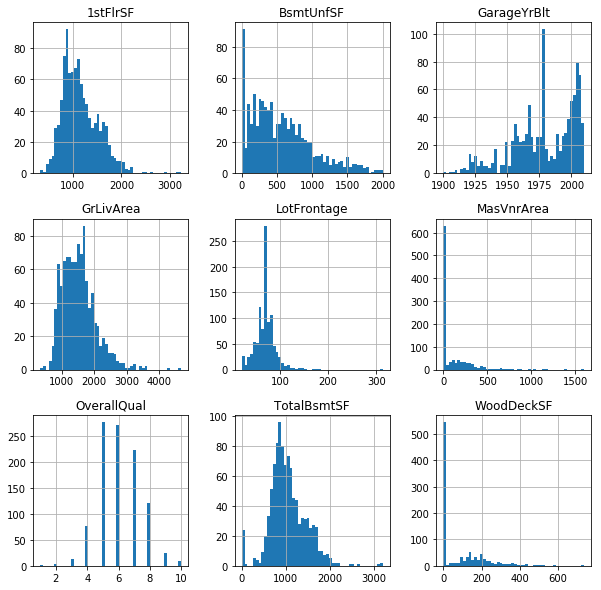

In [12]:
# Let's explore the change in the distributions after the median imputation

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note in the variable LotFrontAge the tall bar at the value of the median in the histogram, which appears after the data imputation.

**A MASSIVE NOTE OF CAUTION**: when encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MISS-REPRESENTING the data!!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order in which they were in the X_train BEFORE the transformation!.


### SimpleImputer: different procedures on different features

On occasions, we want to implement different imputation techniques to different features, how can we do this using the SimpleImputer from Scikit-learn?

We need to use another class called ColumnTransformer. 

**Note** ColumnTransformer has been recently released by Scikit-learn and it is therefore in beta version. This means that the developers can change the way it is used, or remove it altogether any time. The implication is that the code you write today, may not be useful after new releases from Scikit-learn. That is usually what happens with any open-source package when the developers are trying new functionality.

More details about the ColumnTransformer in the [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [13]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],# predictors only
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [14]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

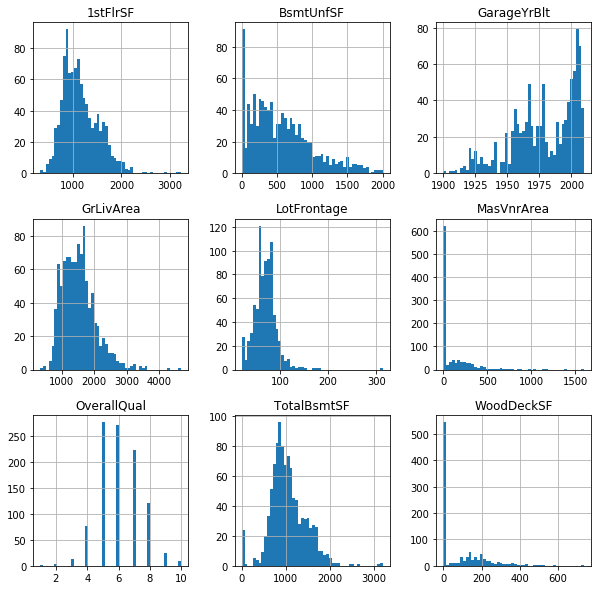

In [15]:
# let's look at the distributions of the variables to decide
# whether we use the mean or the median

X_train.hist(bins=50, figsize=(10,10))
plt.show()

For this demo, I will impute LotFrontage with the mean, and MasVnrArea and GarageYrBlt with the median, as those variables are quite skewed.

In [16]:
# first we need to make lists, indicating which features
# will be imputed with each method

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

# then we instantiate the imputers, within a pipeline
# we create one mean imputer and one median imputer
# by changing the parameter in the strategy

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# then we put the features list and the transformers together
# using the column transformer

# we need to add remainder = True to indicate what we want
# ALL the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer. 

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')


# parameters of the ColumnTransformer
# remainder = 'passthrough' indicates that we want to retain ALL the columns in the dataset
            # otherwise only those specified in the imputing steps will be kept
    
# for more details follow the sklearn page:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [17]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('mean_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0))]), ['LotFrontage']), ('median_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0))]), ['MasVnrArea', 'GarageYrBlt'])])

In [18]:
# we can explore the transformers like this:

preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
         verbose=0))]), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='median', verbose=0))]), ['MasVnrArea', 'GarageYrBlt'])]

In [19]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.66866747])

In [20]:
# and we can corroborate the value with that one in
# the train set
X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [21]:
# for the median imputerthere are 2 values learnt
# because we want to impute 2 different variables

preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [22]:
# and we corroborate those values in the train set
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [23]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)

# and check it worked
np.mean(np.isnan(X_train))

0.0

In [24]:
# and now we can impute the test data
X_test = preprocessor.transform(X_test)

# and check it worked
np.mean(np.isnan(X_test))

0.0

In [25]:
# remember that the returned object  is a NumPy array
X_train

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [26]:
# if we want to put the array back into a dataframe, we need
# to be careful with the column order

# like this, we can explore the features used in each transformer
# including those in the remainder (the ones that were not transformed)
preprocessor.transformers_

[('mean_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
         verbose=0))]), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='median', verbose=0))]), ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

'remainder', 'passthrough', [0, 1, 2, 3, 4, 5]

the code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train

In [27]:
# let's capture the columns in a list

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [28]:
# capture the data back in a dataframe
pd.DataFrame(X_train,
             columns = numeric_features_mean+numeric_features_median+remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.668667,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.668667,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.000000,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.000000,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.000000,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


**ANOTHER NOTE OF CAUTION**

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

- ColumnTransformer first creates a single column dataframe with the first feature, LotFrontage
- ColumnTransformer creates a 2 column dataframe with the features MasVnrArea and GarageBlt
- ColumnTransformer creates an additional dataframe with the remaining features in the train set
- The SimpleImputers learn the parameters in their respective sliced dataframes
- ColunmnTransformer contatenates back all the dataframes into the final result

## 3.11. Arbitrary value imputation with Scikit-learn

Scikit-learn provides a class to make most of the most common data imputation techniques.

The **SimpleImputer** class provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Allows for different missing values encodings (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - additional classes still in beta (may change without warning)
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# we use only the following variables for the demo:
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [4]:
# let's check the null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [5]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [6]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

In [7]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with a constant
# arbitrary value: 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# we fit the imputer to the train set
# the imputer assigns 999 to all variables
imputer.fit(X_train)

SimpleImputer(copy=True, fill_value=999, missing_values=nan,
       strategy='constant', verbose=0)

For arbitrary value imputation, we need to set the strategy to 'constant' and indicate the arbitrary value in the fill_value argument. 

In [8]:
# we can look at the learnt imputation values like this:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [9]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [10]:
# we can transform it back to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


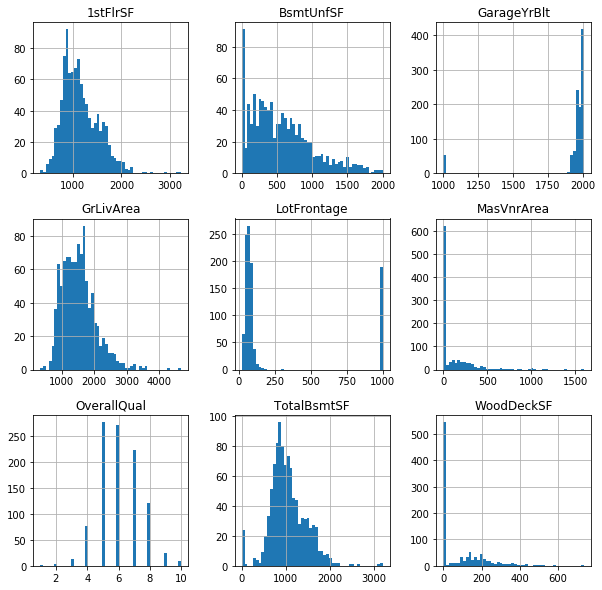

In [11]:
# Let's explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the tall bar at 999 in the LotFrontage's histogram, which appeared after the imputation. You can also see the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

**Remember to be cautious with the order in which you pass the column names** as we discussed in the previous notebook.

### SimpleImputer: different procedures on different features

On occasions, we want to implement different imputation techniques to different features, how can we do this using the SimpleImputer from Scikit-learn?

We need to use another class called ColumnTransformer. 

**Note** ColumnTransformer has been recently released by Scikit-learn and it is therefore in beta version. This means that the developers can change the way it is used, or remove it altogether any time. The implication is that the code you write today, may not be useful after new releases from Scikit-learn. That is usually what happens with any open-source package when the developers are trying new functionality.

More details about the ColumnTransformer in the [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [13]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

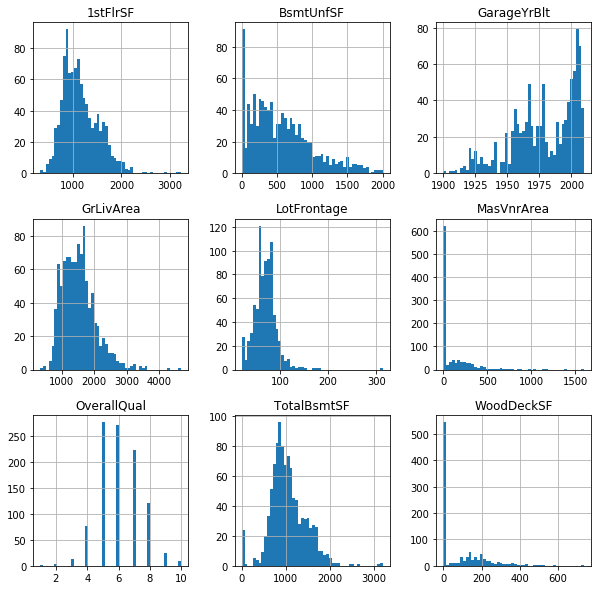

In [14]:
# let's look at the distributions of the variables to decide
# which arbitrary value to use for each feature

X_train.hist(bins=50, figsize=(10,10))
plt.show()

For this demo, I will impute each of LotFrontage, MasVnrArea and GarageYrBlt with different arbitrary values.

In [15]:
# first we need to make lists, indicating which features
# will be imputed with each value

features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# then we instantiate the imputers, within a pipeline
# we create one imputer per feature
# within the imputer I indicate the arbitrary value
# which is differet for each variable

imputer_LotFrontAge = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 999)),
])

imputer_MasVnrArea = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = -10)),
])

imputer_GarageYrBlt = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 1700)),
])

# then we put the features list and the transformers together
# using the column transformer

# in this example, I will use the default parameter of ColumnTransformer
# remainder = drop, which means that only the imputed features will
# be retained, and the rest dropped

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', imputer_LotFrontAge, features_LotFrontAge),
    ('imputer_MasVnrArea', imputer_MasVnrArea, features_MasVnrArea),
    ('imputer_GarageYrBlt', imputer_GarageYrBlt, features_GarageYrBlt)
],remainder = 'drop')

In [16]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('imputer_LotFrontAge', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=999, missing_values=nan,
       strategy='constant', verbose=0))]), ['LotFrontage']), ('imputer_MasVnrArea', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, ...e, fill_value=1700, missing_values=nan,
       strategy='constant', verbose=0))]), ['GarageYrBlt'])])

In [17]:
# we can explore the transformers like this:

preprocessor.transformers

[('imputer_LotFrontAge', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=999, missing_values=nan,
         strategy='constant', verbose=0))]), ['LotFrontage']),
 ('imputer_MasVnrArea', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=-10, missing_values=nan,
         strategy='constant', verbose=0))]), ['MasVnrArea']),
 ('imputer_GarageYrBlt', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=1700, missing_values=nan,
         strategy='constant', verbose=0))]), ['GarageYrBlt'])]

In [18]:
# and we can look at the parameters learnt like this:

# for LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].named_steps['imputer'].statistics_

array([999.])

In [19]:
# for MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].named_steps['imputer'].statistics_

array([-10.])

In [20]:
# for GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].named_steps['imputer'].statistics_

array([1700.])

In [21]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying remainder='drop' in the columnTransformer.

**ANOTHER NOTE OF CAUTION**

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

- ColumnTransformer first creates 3 single column dataframes, one with each of the indicated variables
- The SimpleImputers learn the parameters in their respective sliced dataframes
    - In this case they don't learn anything, because we hard code the arbitrary value
- ColunmnTransformer contatenates back the 3 single column dataframes into the final result, which is a 3 column dataframe

So note that you will not get all the variables from the original X_train, unless you create imputers for all the variables!!

Also, there is a risk of messing up with the order of the features, if we do not use the transformers within a pipeline or we do not keep an eye on the order of the features in the train set, before they were converted to numpy arrays.

In [22]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


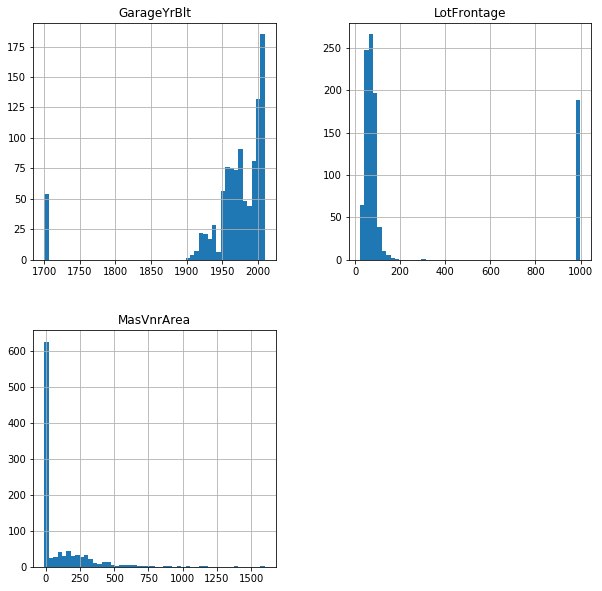

In [23]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the bars corresponding to the arbitrary values at 1700, 999 and -1 for each feature.

## 3.12. Frequent category imputation with Sklearn

Scikit-learn provides a class to make most of the most common data imputation techniques.

The **SimpleImputer** class provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Allows for different missing values encodings (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - additional classes still in beta (may change without warning)
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# we use only the following variables for the demo:
# a mix of categorical and numerical

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']

In [3]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [4]:
# let's check the null values
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

The cateogrical variables Alley, BsmtQual and FirePlaceQu contain missing data.

In [5]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [6]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

### SimpleImputer on the entire dataset

In [7]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the mode of ALL variables
# categorical or not
imputer.fit(X_train[cols_to_use])

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [8]:
# we can look at the learnt frequent values like this:
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

**Note** that the transformer learns the most frequent value for both categorical AND numerical variables.

In [9]:
# and we can investigate the frequent values to corroborate
# the imputer did a good job
X_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [10]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [11]:
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60,573,Pave,Pave
1,Gd,Gd,RL,288,60,0,Pave,Pave
2,TA,Gd,RL,162,50,0,Pave,Pave
3,TA,Gd,RL,356,60,0,Pave,Pave
4,TA,Gd,RL,0,60,0,Pave,Pave


### SimpleImputer: different procedures on different features

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [13]:
# let's look at the missing values
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

For this demo, I will impute:

- categorical variables with the frequent category
- numerical variables with the mean.

In [14]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

# then we instantiate the imputers, within a pipeline
# we create one mean imputer and one frequent category imputer
# by changing the parameter in the strategy

numeric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categoric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', numeric_imputer, features_numeric),
    ('categoric_imputer', categoric_imputer, features_categoric)
])

In [15]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0))]), ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']), ('categoric_imputer', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0))]), ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley'])])

In [16]:
# we can explore the transformers like this:

preprocessor.transformers

[('numeric_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
         verbose=0))]), ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='most_frequent', verbose=0))]), ['BsmtQual',
   'FireplaceQu',
   'MSZoning',
   'Street',
   'Alley'])]

In [17]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['numeric_imputer'].named_steps['imputer'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [18]:
# and we can corroborate the value with that one in
# the train set
X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [19]:
# for frequent category imputer

preprocessor.named_transformers_['categoric_imputer'].named_steps['imputer'].statistics_

array(['TA', 'Gd', 'RL', 'Pave', 'Pave'], dtype=object)

In [20]:
# and we corroborate those values in the train set

X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [21]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [22]:
X_train.shape

(1022, 8)

In [23]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_numeric + features_categoric).head()

,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,318,69.6687,573,Gd,Gd,RL,Pave,Pave
1,288,69.6687,0,Gd,Gd,RL,Pave,Pave
2,162,50,0,TA,Gd,RL,Pave,Pave
3,356,60,0,TA,Gd,RL,Pave,Pave
4,0,60,0,TA,Gd,RL,Pave,Pave


In this case, we passed all the features available in the dataset to the missing data imputers, so the returned dataset contains all the variables.

## Missing Category imputation with Scikit-learn: SimpleImputer

Scikit-learn provides a class to make most of the most common data imputation techniques.

The **SimpleImputer** class provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Allows for different missing values encodings (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - additional classes still in beta (may change without warning)
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## In this demo:

We will do **missing category imputation with Scikit-learn** using the Ames House Price Dataset.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of this course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# let's load the dataset with a few categorical columns

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [4]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [5]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
dtype: float64

In [6]:
# let's inspect the values of the categorical variable
X_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Fa', nan, 'Ex'], dtype=object)

In [7]:
# let's inspect the values of the categorical variable
X_train['FireplaceQu'].unique()

array([nan, 'Gd', 'TA', 'Fa', 'Po', 'Ex'], dtype=object)

In [8]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute by replacing NA
# with 'Missing'

imputer = SimpleImputer(strategy='constant', 
                       fill_value = 'Missing')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train)

SimpleImputer(copy=True, fill_value='Missing', missing_values=nan,
       strategy='constant', verbose=0)

In [9]:
# we can look at the learnt modes like this:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [10]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Missing'],
       ['Gd', 'Gd'],
       ['TA', 'Missing'],
       ...,
       ['Missing', 'Missing'],
       ['Gd', 'TA'],
       ['Gd', 'Missing']], dtype=object)

In [11]:
# encode the train set back to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,BsmtQual,FireplaceQu
0,Gd,Missing
1,Gd,Gd
2,TA,Missing
3,TA,Missing
4,TA,Missing


In [12]:
X_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Fa', 'Missing', 'Ex'], dtype=object)

In [13]:
X_train.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

**A MASSIVE NOTE OF CAUTION**:

Note that when using SimpleImputer and setting the parameters to:
- strategy='constant'
- fill_value = 'Missing'

If your dataframe contains variables that are numerical and categorical, NA in both will be replaced by 'Missing" therefore converting your numerical variables into categorical, which is probably not what you are after.

Most datasets contain both numerical and categorical variables, so very likely you will have to use a column transformer as shown in previous notebooks and as I also show below again.

In [14]:
# let's load the dataset with both numerical and categorical variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [15]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [16]:
# let's look at the missing values

X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

For this demo, I will impute the numerical variables by the mean, and the categorical variables by the most frequent category.

In [17]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
features_categoric = ['BsmtQual', 'FireplaceQu']

# then we instantiate the imputers, within a pipeline
# we create one imputer for numerical and one imputer
# for categorical

imputer_numeric = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

imputer_categoric = Pipeline(
    steps=[('imputer',
            SimpleImputer(strategy='constant', fill_value='Missing'))])

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[('imputer_numeric',
                                                imputer_numeric,
                                                features_numeric),
                                               ('imputer_categoric',
                                                imputer_categoric,
                                                features_categoric)])

In [18]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('imputer_numeric', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0))]), ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']), ('imputer_categoric', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value='Missing', missing_values=nan,
       strategy='constant', verbose=0))]), ['BsmtQual', 'FireplaceQu'])])

In [19]:
# we can explore the transformers like this:
preprocessor.transformers

[('imputer_numeric', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
         verbose=0))]), ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']),
 ('imputer_categoric', Pipeline(memory=None,
       steps=[('imputer', SimpleImputer(copy=True, fill_value='Missing', missing_values=nan,
         strategy='constant', verbose=0))]), ['BsmtQual', 'FireplaceQu'])]

In [20]:
# and we can look at the parameters learnt like this:

# for the numerical imputer
preprocessor.named_transformers_['imputer_numeric'].named_steps['imputer'].statistics_

array([  69.66866747,  103.55358899, 1978.01239669])

In [21]:
# for the categorical imputer
preprocessor.named_transformers_['imputer_categoric'].named_steps['imputer'].statistics_

array(['Missing', 'Missing'], dtype=object)

In [22]:
# and now we can impute the data
# remember it returs a numpy array

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [23]:
# now we convert the result into a dataframe
pd.DataFrame(X_train,
             columns=features_numeric+features_categoric).head()

,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu
0,69.6687,573,1998,Gd,Missing
1,69.6687,0,1996,Gd,Gd
2,50,0,1978.01,TA,Missing
3,60,0,1939,TA,Missing
4,60,0,1930,TA,Missing


In [24]:
# now we convert the result into a dataframe
# and explore the missing values
# there should be none

X_train = pd.DataFrame(X_train,
             columns=features_numeric+features_categoric)

X_train.isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

## Adding a Missing Indicator variable with Scikit-learn ==> MissingIndicator

Scikit-learn provides the **MissingIndicator** class to add a binary variable that flags NA.

The MissingIndicator has the option of adding a Missing indicator binary variable to all the variables in the dataset, or only those that show NA in the train set.

### Attention!

The transformer only returns the binary variables, which need to be added to the original train data.

### More details about the transformers

- [MissingIndicaror](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator)

## In this demo:

We will add a Missing Indicator to the variables of the Ames House Price Dataset

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of this course.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [3]:
# we use only the following variables for the demo:
# a mix of categorical and numerical

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']

In [4]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [5]:
# let's check the null values
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [6]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [7]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

## Add a Missing Indicator

In [8]:
indicator = MissingIndicator(error_on_new=True, features='missing-only')
indicator.fit(X_train)  

MissingIndicator(error_on_new=True, features='missing-only',
         missing_values=nan, sparse='auto')

In [9]:
# we can see the features with na:
# the result shows the index

indicator.features_

array([0, 1, 4, 5, 7], dtype=int64)

In [12]:
# we can find the feature names by passing the index to the
# list of columns

X_train.columns[indicator.features_]

Index(['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'Alley'], dtype='object')

In [13]:
# the indicator returns only the additional indicators
# when we transform the dataset

tmp = indicator.transform(X_train)

tmp

array([[False,  True,  True, False,  True],
       [False, False,  True, False,  True],
       [False,  True, False, False,  True],
       ...,
       [ True,  True, False, False,  True],
       [False, False,  True, False,  True],
       [False,  True, False, False,  True]])

In [14]:
# so we need to join it manually to the original X_train

# let's create a column name for each of the new MissingIndicators
indicator_cols = [c+'_NA' for c in X_train.columns[indicator.features_]]

# and now we concatenate
X_train = pd.concat([
    X_train.reset_index(),
    pd.DataFrame(tmp, columns = indicator_cols)],
    axis=1)

X_train.head()

,index,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley,BsmtQual_NA,FireplaceQu_NA,LotFrontage_NA,MasVnrArea_NA,Alley_NA
0,64,Gd,NaN,RL,318,NaN,573.0,Pave,NaN,False,True,True,False,True
1,682,Gd,Gd,RL,288,NaN,0.0,Pave,NaN,False,False,True,False,True
2,960,TA,NaN,RL,162,50.0,0.0,Pave,NaN,False,True,False,False,True
3,1384,TA,NaN,RL,356,60.0,0.0,Pave,NaN,False,True,False,False,True
4,1100,TA,NaN,RL,0,60.0,0.0,Pave,NaN,False,True,False,False,True


In [15]:
# now the same for the test set
tmp = indicator.transform(X_test)

X_test = pd.concat([
    X_test.reset_index(),
    pd.DataFrame(tmp, columns = indicator_cols)],
    axis=1)

X_test.head()

,index,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley,BsmtQual_NA,FireplaceQu_NA,LotFrontage_NA,MasVnrArea_NA,Alley_NA
0,529,TA,TA,RL,816,NaN,NaN,Pave,NaN,False,False,True,True,True
1,491,TA,TA,RL,238,79.0,0.0,Pave,NaN,False,False,False,False,True
2,459,TA,TA,RL,524,NaN,161.0,Pave,NaN,False,False,True,False,True
3,279,Gd,TA,RL,768,83.0,299.0,Pave,NaN,False,False,False,False,True
4,655,TA,NaN,RM,525,21.0,381.0,Pave,NaN,False,True,False,False,True


### SimpleImputer on the entire dataset

In [16]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [17]:
# we can look at the learnt frequent values like this:
imputer.statistics_

array([0, 'TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave', False, False,
       False, False, True], dtype=object)

**Note** that the transformer learns the most frequent value for both categorical AND numerical variables.

In [18]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[64, 'Gd', 'Gd', ..., True, False, True],
       [682, 'Gd', 'Gd', ..., True, False, True],
       [960, 'TA', 'Gd', ..., False, False, True],
       ...,
       [1216, 'TA', 'Gd', ..., False, False, True],
       [559, 'Gd', 'TA', ..., True, False, True],
       [684, 'Gd', 'Gd', ..., False, False, True]], dtype=object)

## Automatic selection of best imputation technique with Sklearn

In this notebook we will do a grid search over the imputation methods available in Scikit-learn to determine which imputation technique works best for this dataset and the machine learning model of choice.

We will also train a very simple machine learning model as part of a small pipeline.

We will use the House Price dataset.

- To download the dataset please visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# import extra classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [2]:
# load dataset with all the variables

data = pd.read_csv('../houseprice.csv',)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in data.columns if data[c].dtypes=='O']

# find numerical variables
# those different from object and also excluding the target SalePrice
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='SalePrice']

In [4]:
# inspect the categorical variables

data[features_categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
# inspect the numerical variables

data[features_numerical].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [6]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1),  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [7]:
# We create the preprocessing pipelines for both
# numerical and categorical data

# adapted from Scikit-learn code available here under BSD3 license:
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, features_numerical),
        ('categorical', categorical_transformer, features_categorical)])

# Note that to initialise the pipeline I pass any argument to the transformers.
# Those will be changed during the gridsearch below.

In [8]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', Lasso(max_iter=2000))])

In [9]:
# now we create the grid with all the parameters that we would like to test

param_grid = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(clf, param_grid, cv=5, iid=False, n_jobs=-1, scoring='r2')

# cv=3 is the cross-validation
# no_jobs =-1 indicates to use all available cpus
# scoring='r2' indicates to evaluate using the r squared

# for more details in the grid parameters visit:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

When setting the grid parameters, this is how we indicate the parameters:

preprocessor__numerical__imputer__strategy': ['mean', 'median'],

the above line of code indicates that I would like to test the mean and the median in the imputer step of the numerical processor.

preprocessor__categorical__imputer__strategy': ['most_frequent', 'constant']

the above line of code indicates that I would like to test the most frequent or a constant value in the imputer step of the categorical processor

classifier__alpha': [0.1, 1.0, 0.5]

the above line of code indicates that I want to test those 3 values for the alpha parameter of Lasso. Note that Lasso is the 'classifier' step of our last pipeline

In [10]:
# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best linear regression from grid search: 0.933


In [11]:
# we can print the best estimator parameters like this
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                       

In [12]:
# and find the best fit parameters like this
grid_search.best_params_

{'classifier__alpha': 100,
 'preprocessor__categorical__imputer__strategy': 'constant',
 'preprocessor__numerical__imputer__strategy': 'median'}

In [13]:
# here we can see all the combinations evaluated during the gridsearch
grid_search.cv_results_['params']

[{'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean'},
 {'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median'},
 {'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__imputer__strategy': 'mean'},
 {'classifier__alpha': 10,
  'preprocessor__categorical__imputer__strategy': 'constant',
  'preprocessor__numerical__imputer__strategy': 'median'},
 {'classifier__alpha': 100,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'mean'},
 {'classifier__alpha': 100,
  'preprocessor__categorical__imputer__strategy': 'most_frequent',
  'preprocessor__numerical__imputer__strategy': 'median'},
 {'classifier__alpha': 100,
  'preprocessor__categorical__imputer__strategy': 'constant',
  'pre

In [14]:
# and here the scores for each of one of the above combinations
grid_search.cv_results_['mean_test_score']

array([0.84746254, 0.84739594, 0.84814964, 0.8481309 , 0.86624908,
       0.86621021, 0.86646886, 0.86651035, 0.86552764, 0.8654755 ,
       0.86525292, 0.86523714])

In [15]:
# and finally let's check the performance over the test set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best linear regression from grid search: 0.738


This model overfits to the train set, look at the r2 of 0.93 obtained for the train set vs 0.738 for the test set.

We will try to reduce this over-fitting as we progress in the course.

## Mean / Median Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

All the predictor variables contain missing data.

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the numerical variables automatically

In [5]:
# we call the imputer from feature-engine
# we specify the imputation strategy, median in this case

imputer = mdi.MeanMedianImputer(imputation_method='median')

In [6]:
# we fit the imputer

imputer.fit(X_train)

MeanMedianImputer(imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [7]:
# we see that the imputer found the numerical variables to
# impute with the mean
imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# here we can see the mean assigned to each variable
imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

In [9]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,69.0,573.0,1998.0
682,Gd,Gd,69.0,0.0,1996.0
960,TA,NaN,50.0,0.0,1979.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


In [10]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-Engine allows you to specify variable groups easily

In [11]:
# let's do mean imputation this time
# and let's do it over 2 of the 3 numerical variables

imputer = mdi.MeanMedianImputer(imputation_method='mean',
                                variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean',
         variables=['LotFrontage', 'MasVnrArea'])

In [12]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [13]:
# and we can see the value assigned to each variable
imputer.imputer_dict_

{'LotFrontage': 69.66866746698679, 'MasVnrArea': 103.55358898721731}

In [14]:
# let's corroborate that the dictionary above contains
# the mean values of th variables

X_train[imputer.variables].mean()

LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [15]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature-Engine can be used with the Scikit-learn pipeline

In [16]:
pipe = Pipeline([
    ('median_imputer', mdi.MeanMedianImputer(imputation_method='median',
                                             variables = ['LotFrontage', 'GarageYrBlt'])),
     
    ('mean_imputer', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables = ['MasVnrArea'])),
     ])

In [17]:
pipe.fit(X_train)

Pipeline(memory=None,
     steps=[('median_imputer', MeanMedianImputer(imputation_method='median',
         variables=['LotFrontage', 'GarageYrBlt'])), ('mean_imputer', MeanMedianImputer(imputation_method='mean', variables=['MasVnrArea']))])

In [18]:
pipe.named_steps['median_imputer'].imputer_dict_

{'LotFrontage': 69.0, 'GarageYrBlt': 1979.0}

In [19]:
pipe.named_steps['mean_imputer'].imputer_dict_

{'MasVnrArea': 103.55358898721731}

In [20]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

## Arbitrary Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

All the predictor variables contain missing data.

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the numerical variables automatically

In [5]:
# we call the imputer from feature-engine
# we specify the arbitrary value as an argument

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999)

In [6]:
# we fit the imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
            variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [7]:
# we see that the imputer found the numerical variables to
# impute with the arbitrary value

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# here we can see the arbitrary value stored
imputer.arbitrary_number

-999

In [9]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,-999.0,573.0,1998.0
682,Gd,Gd,-999.0,0.0,1996.0
960,TA,NaN,50.0,0.0,-999.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


In [10]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-engine allows you to specify variable groups easily

In [11]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerical variables

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                     variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
            variables=['LotFrontage', 'MasVnrArea'])

In [12]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [13]:
# and we can see the value assigned to each variable
imputer.arbitrary_number

-999

In [14]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature-engine can be used with the Scikit-learn pipeline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000DD72ECCDA0>,
      dtype=object)

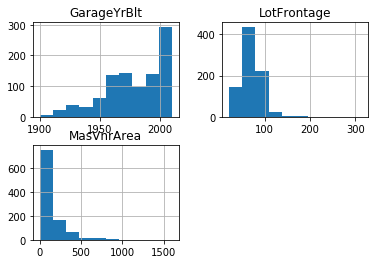

In [15]:
# let's look at the distributions to determine the
# arbitraty values to use

X_train.hist()

In [16]:
pipe = Pipeline([
    ('imputer_999', mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                             variables = ['LotFrontage', 'MasVnrArea'])),
     
    ('imputer_minus1', mdi.ArbitraryNumberImputer(arbitrary_number = -1,
                                          variables = ['GarageYrBlt'])),
     ])

In [17]:
pipe.fit(X_train)

Pipeline(memory=None,
     steps=[('imputer_999', ArbitraryNumberImputer(arbitrary_number=-999,
            variables=['LotFrontage', 'MasVnrArea'])), ('imputer_minus1', ArbitraryNumberImputer(arbitrary_number=-1, variables=['GarageYrBlt']))])

In [18]:
pipe.named_steps['imputer_999'].arbitrary_number

-999

In [19]:
pipe.named_steps['imputer_minus1'].arbitrary_number

-1

In [20]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

There are no more null values for the 3 imputed numerical variables.

## End of distribution Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

All the predictor variables contain missing data.

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the numerical variables automatically

In [5]:
# we call the imputer from feature-engine

# we specify whether we want to find the values using
# the gaussian approximation or the inter-quantal range
# proximity rule.

# in addition we need to specify if we want the values placed at 
# the left or right tail

imputer = mdi.EndTailImputer(distribution='gaussian', tail='right')

In [6]:
# we fit the imputer

imputer.fit(X_train)

EndTailImputer(distribution='gaussian', fold=3, tail='right',
        variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [7]:
# we see that the imputer found the numerical variables to
# impute with the end of distribution value

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# here we can see the values that will be used
# to replace NA for each variable

imputer.imputer_dict_

{'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415157,
 'GarageYrBlt': 2052.9707419772235}

In [9]:
# and this is how those values were calculated
# which is how we learnt in the first notebooks of
# this section

X_train[imputer.variables].mean() + 3 * X_train[imputer.variables].std()

LotFrontage     138.902220
MasVnrArea      648.394711
GarageYrBlt    2052.970742
dtype: float64

In [10]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,138.90222,573.0,1998.000000
682,Gd,Gd,138.90222,0.0,1996.000000
960,TA,NaN,50.00000,0.0,2052.970742
1384,TA,NaN,60.00000,0.0,1939.000000
1100,TA,NaN,60.00000,0.0,1930.000000


In [11]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-engine allows you to specify variable groups easily

In [12]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerival variables

# let's also select the proximity rule on the left tail

imputer = mdi.EndTailImputer(distribution='skewed', tail='left',
                             variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

EndTailImputer(distribution='skewed', fold=3, tail='left',
        variables=['LotFrontage', 'MasVnrArea'])

In [13]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [14]:
# and we can see the value assigned to each variable
imputer.imputer_dict_

{'LotFrontage': -8.0, 'MasVnrArea': -510.0}

In [15]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature-engine can be used with the Scikit-learn pipeline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A9D76792E8>,
      dtype=object)

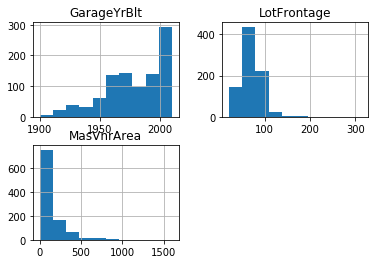

In [16]:
# let's look at the distributions to determine the
# end tail value selection method

X_train.hist()

All variables are skewed. For this demo, I will use the proximity rule for GarageYrBlt and MasVnrArea, and the Gaussian approximation for LotFrontage.

In [17]:
pipe = Pipeline([
    ('imputer_skewed', mdi.EndTailImputer(distribution='skewed', tail='right',
                                          variables=['GarageYrBlt', 'MasVnrArea'])),

    ('imputer_gaussian', mdi.EndTailImputer(distribution='gaussian', tail='right',
                                            variables=['LotFrontage'])),
])

In [18]:
pipe.fit(X_train)

Pipeline(memory=None,
     steps=[('imputer_skewed', EndTailImputer(distribution='skewed', fold=3, tail='right',
        variables=['GarageYrBlt', 'MasVnrArea'])), ('imputer_gaussian', EndTailImputer(distribution='gaussian', fold=3, tail='right',
        variables=['LotFrontage']))])

In [19]:
pipe.named_steps['imputer_skewed'].imputer_dict_

{'GarageYrBlt': 2121.0, 'MasVnrArea': 680.0}

In [20]:
pipe.named_steps['imputer_gaussian'].imputer_dict_

{'LotFrontage': 138.9022201686726}

In [21]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

There are no more null values for the 3 imputed numerical variables.

## Frequent Category Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

All the predictor variables contain missing data.

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the categorical variables automatically

In [5]:
# we call the imputer from feature-engine
# we don't need to specify anything 

imputer = mdi.FrequentCategoryImputer()

In [6]:
# we fit the imputer

imputer.fit(X_train)

FrequentCategoryImputer(variables=['BsmtQual', 'FireplaceQu'])

In [7]:
# we see that the imputer found the categorical variables to
# impute with the frequent category

imputer.variables

['BsmtQual', 'FireplaceQu']

In [8]:
# here we can see the values that will be used
# to replace NA for each variable

imputer.imputer_dict_

{'BsmtQual': 'TA', 'FireplaceQu': 'Gd'}

In [9]:
# let's check those values agains the train data

X_train[imputer.variables].mode()

,BsmtQual,FireplaceQu
0,TA,Gd


In [10]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,Gd,NaN,573.0,1998.0
682,Gd,Gd,NaN,0.0,1996.0
960,TA,Gd,50.0,0.0,NaN
1384,TA,Gd,60.0,0.0,1939.0
1100,TA,Gd,60.0,0.0,1930.0


In [11]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

## Feature-engine allows you to specify variable groups easily

In [12]:
# let's do it imputation but this time
# and let's do it over 1 of the 2 categorical variables

imputer = mdi.FrequentCategoryImputer(variables=['BsmtQual'])

imputer.fit(X_train)

FrequentCategoryImputer(variables=['BsmtQual'])

In [13]:
# now the imputer uses only the variables we indicated

imputer.variables

['BsmtQual']

In [14]:
# and we can see the value assigned to each variable
imputer.imputer_dict_

{'BsmtQual': 'TA'}

In [15]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

BsmtQual    0.0
dtype: float64

It worked!

## Missing Category Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the categorical variables automatically

In [5]:
# we call the imputer from featur- engine
# we don't need to specify anything 

imputer = mdi.CategoricalVariableImputer()

In [6]:
# we fit the imputer

imputer.fit(X_train)

CategoricalVariableImputer(variables=['BsmtQual', 'FireplaceQu'])

In [7]:
# we see that the imputer found the categorical variables to
# impute with the frequent category

imputer.variables

['BsmtQual', 'FireplaceQu']

**This imputer will replace missing data in categorical variables by 'Missing'**

In [8]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,Missing,NaN,573.0,1998.0
682,Gd,Gd,NaN,0.0,1996.0
960,TA,Missing,50.0,0.0,NaN
1384,TA,Missing,60.0,0.0,1939.0
1100,TA,Missing,60.0,0.0,1930.0


In [9]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
dtype: float64

## Feature-engine allows you to specify variable groups easily

In [10]:
# let's do it imputation but this time
# and let's do it over 1 of the 2 categorical variables

imputer = mdi.CategoricalVariableImputer(variables=['BsmtQual'])

imputer.fit(X_train)

CategoricalVariableImputer(variables=['BsmtQual'])

In [11]:
# now the imputer uses only the variables we indicated

imputer.variables

['BsmtQual']

In [12]:
# now the imputer uses only the variables we indicated

imputer.variables

['BsmtQual']

## Feature-engine can be used with the Scikit-learn pipeline

In [13]:
# let's check the percentage of NA in each categorical variable

X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

- BsmtQual: 0.023 ==> frequent category imputation
- FirePlaceQu: 0.46 ==> missing category imputation

In [14]:
pipe = Pipeline([
    ('imputer_mode', mdi.FrequentCategoryImputer(variables=['BsmtQual'])),
    ('imputer_missing', mdi.CategoricalVariableImputer(variables=['FireplaceQu'])),
])

In [15]:
pipe.fit(X_train)

Pipeline(memory=None,
     steps=[('imputer_mode', FrequentCategoryImputer(variables=['BsmtQual'])), ('imputer_missing', CategoricalVariableImputer(variables=['FireplaceQu']))])

In [16]:
pipe.named_steps['imputer_mode'].variables

['BsmtQual']

In [17]:
pipe.named_steps['imputer_missing'].variables

['FireplaceQu']

In [18]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

## Random Sample Imputation ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine Random Sampler captures all the variables by default

In [5]:
# we call the imputer from feature-engine
# we don't need to specify anything 

imputer = mdi.RandomSampleImputer(random_state = 29)

In [6]:
# we fit the imputer

imputer.fit(X_train)

RandomSampleImputer(random_state=29,
          variables=['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [7]:
# we see that the imputer selected all the variables numerical
# and categorical

imputer.variables

['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# the imputer stores a copy of the selected variables from
# the train set, from which to extract the random sample

imputer.X.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,NaN,573.0,1998.0
682,Gd,Gd,NaN,0.0,1996.0
960,TA,NaN,50.0,0.0,NaN
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


In [9]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,TA,60.0,573.0,1998.0
682,Gd,Gd,90.0,0.0,1996.0
960,TA,Gd,50.0,0.0,1977.0
1384,TA,Gd,60.0,0.0,1939.0
1100,TA,Gd,60.0,0.0,1930.0


In [10]:
# let's check absence of NA

tmp[imputer.variables].isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

**Note** at the moment, feature-engine RandomSampleImputer does not support setting the seed.

The procedures to select a specific group of variables to use the RandomSampleImputer, or how to integrate it with the Scikit-learn pipeline are the same as we did in previous notebooks.

## Missing Indicator ==> Feature-Engine


### What is Feature-Engine

Feature-Engine is an open source python package that I created at the back of this course. 

- Feature-Engine includes all the feature engineering techniques described in the course
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

- Make sure you have installed feature-engine before running this notebook

For more information visit:
my website

## In this demo

We will use Feature-Engine to perform mean or median imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine's missing indicator selects all variables by default

In [9]:
# we call the imputer from feature-engine
# we don't need to specify anything 

imputer = mdi.AddNaNBinaryImputer()

In [10]:
# we fit the imputer

imputer.fit(X_train)

AddNaNBinaryImputer(variables=['BsmtQual', 'FireplaceQu', 'LotFrontage',
                               'MasVnrArea', 'GarageYrBlt'])

In [11]:
# we see that the imputer selected all the variables numerical
# and categorical

imputer.variables

['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
# feature-engine returns a dataframe
# with the additional features

# no need to contatenate!!

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual_na,FireplaceQu_na,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
64,Gd,NaN,NaN,573.0,1998.0,0,1,1,0,0
682,Gd,Gd,NaN,0.0,1996.0,0,0,1,0,0
960,TA,NaN,50.0,0.0,NaN,0,1,0,0,1
1384,TA,NaN,60.0,0.0,1939.0,0,1,0,0,0
1100,TA,NaN,60.0,0.0,1930.0,0,1,0,0,0


In [13]:
# let's check NA

tmp.isnull().mean()

BsmtQual          0.023483
FireplaceQu       0.467710
LotFrontage       0.184932
MasVnrArea        0.004892
GarageYrBlt       0.052838
BsmtQual_na       0.000000
FireplaceQu_na    0.000000
LotFrontage_na    0.000000
MasVnrArea_na     0.000000
GarageYrBlt_na    0.000000
dtype: float64

## Feature-engine allows you to specify variable groups easily

In [14]:
# let's do it imputation but this time
# and let's select a few variables

imputer = mdi.AddNaNBinaryImputer(variables=['BsmtQual', 'FireplaceQu', 'LotFrontage'])

imputer.fit(X_train)

AddNaNBinaryImputer(variables=['BsmtQual', 'FireplaceQu', 'LotFrontage'])

In [15]:
# now the imputer uses only the variables we indicated

imputer.variables

['BsmtQual', 'FireplaceQu', 'LotFrontage']

In [16]:
# feature-engine returns a dataframe
# with the additional features

# no need to contatenate!!

tmp = imputer.transform(X_train)

tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual_na,FireplaceQu_na,LotFrontage_na
64,Gd,NaN,NaN,573.0,1998.0,0,1,1
682,Gd,Gd,NaN,0.0,1996.0,0,0,1
960,TA,NaN,50.0,0.0,NaN,0,1,0
1384,TA,NaN,60.0,0.0,1939.0,0,1,0
1100,TA,NaN,60.0,0.0,1930.0,0,1,0


## Feature-engine can be used with the Scikit-learn pipeline

In [17]:
# let's check the percentage of NA in each variable

X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [18]:
X_train.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,NaN,573.0,1998.0
682,Gd,Gd,NaN,0.0,1996.0
960,TA,NaN,50.0,0.0,NaN
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


These are the steps we will concatenate

- Add Missing Indicator to all variables
- Median Imputation to numerical variables
- Missing category imputation to categorical variables

In [19]:
pipe = Pipeline([
    ('missing_ind', mdi.AddNaNBinaryImputer()),
    ('imputer_mode', mdi.FrequentCategoryImputer(variables=['FireplaceQu', 'BsmtQual'])),
    ('imputer_median', mdi.MeanMedianImputer(imputation_method = 'median',
                                             variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
])

In [20]:
# fit the pipe
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['BsmtQual', 'FireplaceQu',
                                                'LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_mode',
                 FrequentCategoryImputer(variables=['FireplaceQu',
                                                    'BsmtQual'])),
                ('imputer_median',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt']))],
         verbose=False)

In [21]:
# inspect the separate steps
pipe.named_steps['missing_ind'].variables

['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [22]:
pipe.named_steps['imputer_mode'].imputer_dict_

{'FireplaceQu': 'Gd', 'BsmtQual': 'TA'}

In [23]:
pipe.named_steps['imputer_median'].imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

In [24]:
# let's transform the data with the pipeline

# this pipeline will:
#- add the missing indicators
#- fill na in the original variables
# leaving the dataset ready to use for ML

tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual          0.0
FireplaceQu       0.0
LotFrontage       0.0
MasVnrArea        0.0
GarageYrBlt       0.0
BsmtQual_na       0.0
FireplaceQu_na    0.0
LotFrontage_na    0.0
MasVnrArea_na     0.0
GarageYrBlt_na    0.0
dtype: float64

In [25]:
tmp.shape

(1022, 10)